In [2]:
# this block contains dependencies for this notebook

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as nm

import math
import pylab
import matplotlib

# this cell contains dependencies for this notebook
import math
import numpy as nm
import matplotlib.pyplot as plt
import pylab
import matplotlib
import mpmath as mp
import pandas as pd
import os
from sklearn.metrics import mean_squared_error
import scipy.stats as scist
from scipy.optimize import fsolve

from sympy.solvers import solve
from sympy import Symbol

mp.dps = 500 # sets parameters for use of mpmath package
from matplotlib import ticker, cm

import matplotlib.colors as colors
import matplotlib.cbook as cbook
import matplotlib

from pyearth import Earth

In [52]:
# set parameters same as for simulations

color1='skyblue'         # color for plotting characteristics
colorbold='dimgrey'      # color for limiting characteristic
matplotlib.rcParams.update({'font.size': 16}) # sets the font size for characteristics figures
%config InlineBackend.figure_format = 'retina' # sets the image resolution to retina quality
location = "Desktop/variable_c_data/" # path to simulation data
name = "rational_longhill_extralong/rational_info_" # beginning of filename for simulation csv files
        

ksvals = [5.*10**(-2.),3.*10**(-3.),1.*10**(-4.),0.] # sand, loam, clay (mm/s) from same source as A0
bvals = nm.linspace(0.35,0.65,5)  # I = K*D^(-b), range from Mongo (2016), made more extreme from "most b values" range
Kvals = [0.5,1.,5.,10.] # values of K used in simulations (mm/s)

A0vals={ks:[] for ks in ksvals}

for ks in ksvals:
    if ks == 5.*10**(-2.):
        A0vals[ks] = [1.,0.1,0.] # mm/s^1/2
    elif ks == 3.*10**(-3.): #silt
        A0vals[ks] = [1.,0.1,0.] #mm/s^1/2
    elif ks == 1.*10**(-4.): #loam
        A0vals[ks] = [0.1,0.01,0.] # mm/s^1/2
    elif ks==0.:
        A0vals[ks]=[0.]



Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_5.0_1.0_0.5.csv
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_5.0_0.1_0.5.csv
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_5.0_0.0_0.5.csv
K = 5.0, b = 0.5


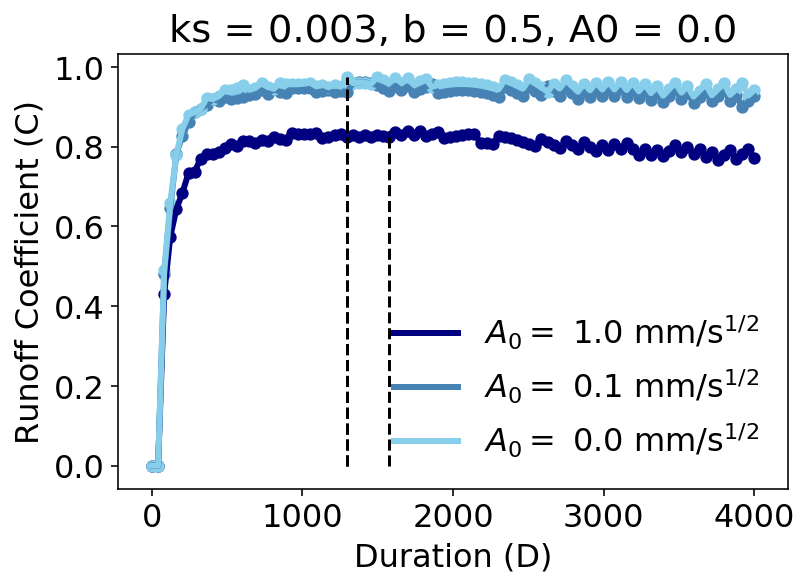

In [15]:
# plots Cpeak for different values of A0 along with tc

lw = 3
colorlist = ['navy','steelblue','skyblue','lightblue']#['yellowgreen','olivedrab','darkolivegreen']#
cc = 0

for ks in [0.003]: # ksvals
    for K in [5.]: #Kvals:
        for b in [0.5]:#bvals:
            cc=0
            for A0 in [1.,0.1,0.]:#[A0vals[ks]]:
                print (location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                plt.plot(df['D'],df['Q']/df['I']/df['A'],linewidth = lw,label='$A_0=$ '+str(A0)+' mm/s$^{1/2}$',c=colorlist[cc])#label='$C_2$',,c = 'skyblue')
                plt.scatter(df['D'],df['Q']/df['I']/df['A'],linewidth = lw,c=colorlist[cc],s=10)#label='$C_2$',,c = 'skyblue')

                cross = -1
                crossp = -1

                for i in range(len(df['A'].tolist())):
                    if df['A'].tolist()[i]==max(df['A'].tolist()) and cross==-1:
                        cross = i
                    if df['Q'].tolist()[i]==max(df['Q'].tolist()) and crossp==-1:
                        crossp = i
                cv = df['Q']/df['I']/df['A']
                plt.plot([df['D'].tolist()[cross],df['D'].tolist()[cross]],[0.,max(cv)],c = 'k',linestyle = '--')

                
                
                plt.title('ks = '+str(ks)+', b = '+str(b)+', A0 = '+str(A0))
                
                
                
                cc+=1
            print ('K = '+str(K)+', b = '+str(b))
            plt.xlabel('Duration (D)')
            plt.ylabel('Runoff Coefficient (C)')
            plt.legend(frameon=False,loc='lower right')
            plt.show()


[0.35  0.425 0.5   0.575 0.65 ]
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_2.5_0.1_0.5.csv
ks = 0.003, b = 0.5, A0 = 0.1


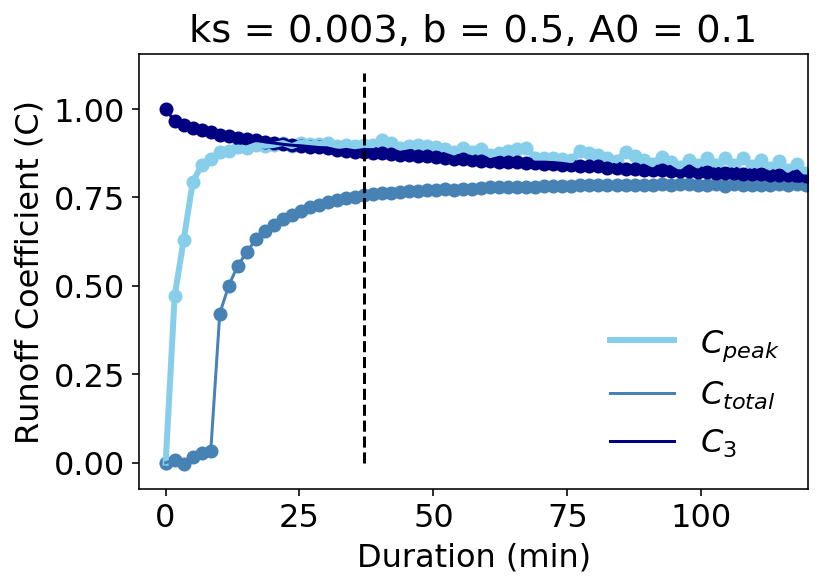

In [16]:
# plots 3 definitions of C together with tc

lw = 3
colorlist = ['navy','steelblue','skyblue','lightblue']#['yellowgreen','olivedrab','darkolivegreen']#
cc = 0
print (bvals)
matplotlib.rcParams.update({'font.size': 16})

for ks in [0.003]: #ksvals:
    for K in [2.5]: #Kvals[ks]:
        for A0 in [0.1]: #A0vals[ks]:
            if A0!=0.01:
                for b in [0.5]: #bvals:
                    print (location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                    df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                    try:
                        

                        plt.plot(df['D']/60,df['Q']/df['I']/df['A'],linewidth = lw, label='$C_{peak}$',c='skyblue')#lw,label='$A_0=$ '+str(A0),c = colorlist[cc])#,label='$C_2$')
                        plt.scatter(df['D']/60,df['Q']/df['I']/df['A'],c='skyblue')#,c = colorlist[cc])
                        plt.plot(df['D']/60,df['Creal '],label='$C_{total}$',c='steelblue')#label=labels[cc],c = colorlist[cc])#,c = 'skyblue',linewidth = lw)
                        plt.scatter(df['D']/60,df['Creal '],label = '_nolegend_',c='steelblue')#,c = colorlist[cc])#,c = 'skyblue')
                        plt.plot(df['D']/60,df['C'],label='$C_3$',c='navy')#,c = 'skyblue',linewidth = lw)
                        plt.scatter(df['D']/60,df['C'],label = '_nolegend_',c='navy')#,c = 'skyblue')
                        
                    except:
                        plt.plot(df['D'],df['Creal'],label=labels[cc],c = colorlist[cc])#,c = 'skyblue',linewidth = lw)

                        plt.plot(df['D']/60,df['Q']/df['I']/df['A'],linewidth = lw,label='$A_0=$ '+str(A0),c=colorlist[cc])#label='$C_2$',,c = 'skyblue')
                        plt.scatter(df['D']/60,df['Q']/df['I']/df['A'],c = colorlist[cc])
                        plt.plot(df['D']/60,df['C '],label = '$C_3$',c = 'skyblue',linewidth = lw)
                        plt.scatter(df['D']/60,df['C '],label = '_nolegend_',c = 'skyblue')
                        plt.scatter(df['D']/60,df['Creal'],label = '_nolegend_',c = colorlist[cc])#,c = 'skyblue')
                    cross = -1
                    crossp = -1

                    for i in range(len(df['A'].tolist())):
                        if df['A'].tolist()[i]==max(df['A'].tolist()) and cross==-1:
                            cross = i
                        if df['Q'].tolist()[i]==max(df['Q'].tolist()) and crossp==-1:
                            crossp = i
                    plt.plot([df['D'].tolist()[cross]/60,df['D'].tolist()[cross]/60],[0.,1.1],c = 'k',linestyle = '--')
                    cv = df['Q']/df['I']/df['A']
                    #print (cv.tolist()[int(cross)])
                    #plt.plot([df['D'].tolist()[crossp],df['D'].tolist()[crossp]],[0.,1.1],c = 'r',linestyle = '--')
                    plt.xlim(-5,120)
                    plt.xlabel('Duration (min)')
                    plt.ylabel('Runoff Coefficient (C)')
                    plt.title('ks = '+str(ks)+', b = '+str(b)+', A0 = '+str(A0))
                    print ('ks = '+str(ks)+', b = '+str(b)+', A0 = '+str(A0))
                    plt.legend(frameon=False,loc='lower right')
                    plt.show()
                    cc+=1
                    


Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.0_5.0_0.0_0.5.csv
0.5781777634508717
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_5.0_0.0_0.5.csv
ks = 0.003, b = 0.5, A0 = 0.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_5.0_1.0_0.5.csv
ks = 0.003, b = 0.5, A0 = 1.0


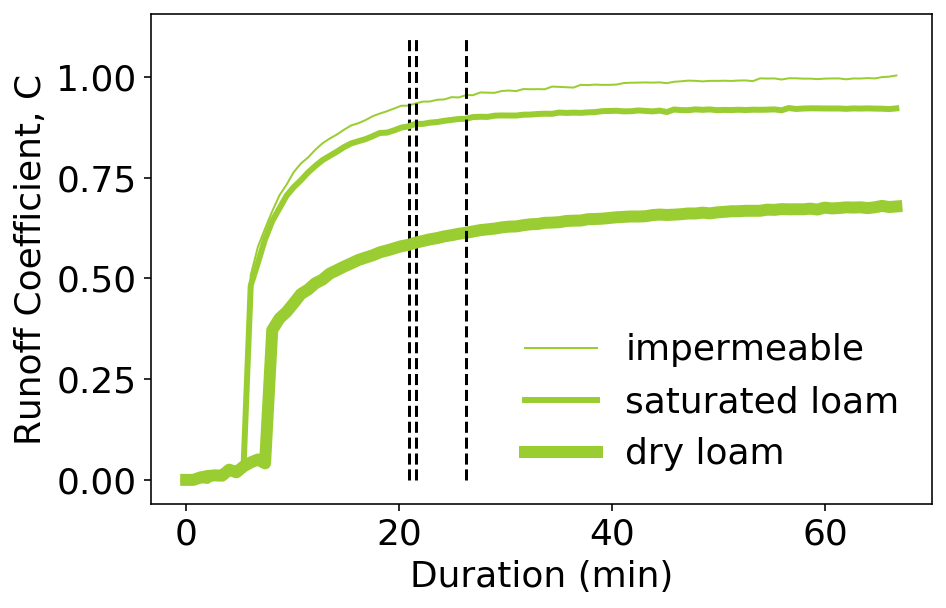

In [22]:
# Ctotal under different loss assumptions plotted with tc

lw0 = 1
lw1=3
lw2=6
colorlist = ['yellowgreen','yellowgreen','yellowgreen']
labels=['impermeable','saturated sand','dry sand']
cc = 0
plt.figure(figsize=(7,4.5))
matplotlib.rcParams.update({'font.size': 18}) # sets the font size for characteristics figures

Kval = 5.
bval = 0.5

for ks in [0.0]: 
    for K in [Kval]:
        for A0 in [0.0]:
            for b in [bval]:
                print (location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                plotd = [dd/60 for dd in df['D'].tolist()]
                plt.plot(plotd,df['Creal '],label=labels[cc],c = colorlist[cc],linewidth=lw0)#,c = 'skyblue',linewidth = lw)
                cross = -1
                crossp = -1
                for i in range(len(df['A'].tolist())):
                    if df['A'].tolist()[i]==max(df['A'].tolist()) and cross==-1:
                        cross = i
                    if df['Q'].tolist()[i]==max(df['Q'].tolist()) and crossp==-1:
                        crossp = i
                plt.plot([df['D'].tolist()[cross]/60,df['D'].tolist()[cross]/60],[0.,1.1],c = 'k',linestyle = '--')
                cv = df['Q']/df['I']/df['A']
                print (df['Creal '].tolist()[int(cross/3)])
cc=1
labels=['impermeable','saturated loam','dry loam']
lw = lw0
for ks in [0.003]:
    for K in [Kval]:
        for A0 in [0.0,1.]:
            for b in [bval]:
                if lw==lw0:
                    lw=lw1
                elif lw==lw1:
                    lw=lw2
                print (location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                
                plotd = [dd/60 for dd in df['D'].tolist()]
                plt.plot(plotd,df['Creal '],label=labels[cc],linewidth=lw,c = colorlist[cc])#,c = 'skyblue',linewidth = lw)
                cc+=1
                cross = -1
                crossp = -1
                for i in range(len(df['A'].tolist())):
                    if df['A'].tolist()[i]==max(df['A'].tolist()) and cross==-1:
                        cross = i
                    if df['Q'].tolist()[i]==max(df['Q'].tolist()) and crossp==-1:
                        crossp = i
                plt.plot([df['D'].tolist()[cross]/60.,df['D'].tolist()[cross]/60.],[0.,1.1],c = 'k',linestyle = '--')
                cv = df['Q']/df['I']/df['A']
                print ('ks = '+str(ks)+', b = '+str(b)+', A0 = '+str(A0))
                plt.legend(frameon=False,loc='lower right')
                plt.xlabel('Duration (min)')
                plt.ylabel('Runoff Coefficient, C')


Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.0_5.0_0.0_0.5.csv
0.5781777634508717
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_5.0_0.0_0.5.csv
0.5388192336979271
ks = 0.003, b = 0.5, A0 = 0.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_5.0_1.0_0.5.csv
0.4003411052557745
ks = 0.003, b = 0.5, A0 = 1.0


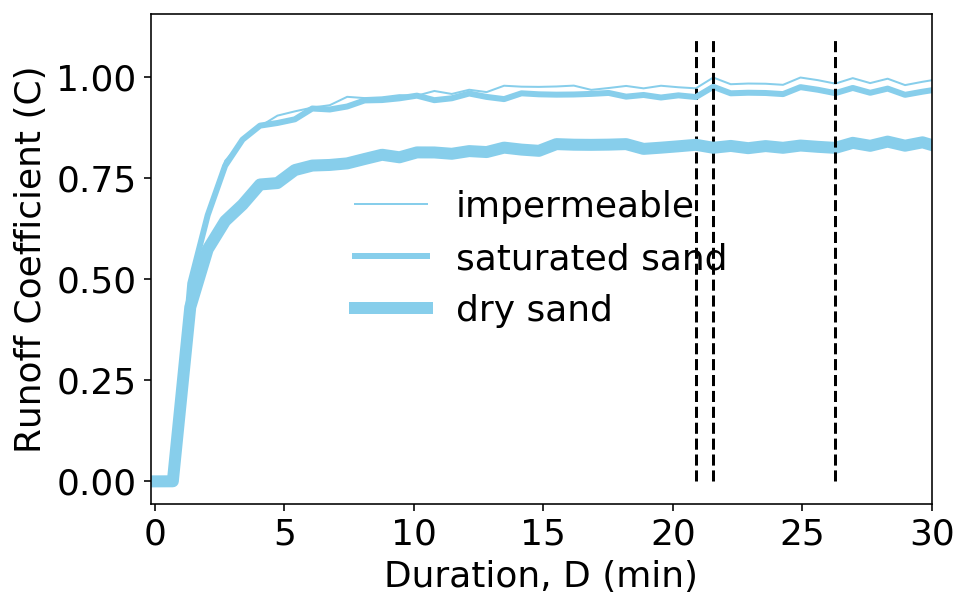

In [25]:
# Cpeak under different assumptions plotted with tc

lw0 = 1
lw1=3
lw2=6
colorlist = ['skyblue','skyblue','skyblue']
labels=['impermeable','saturated loam','dry loam']
cc = 0
plt.figure(figsize=(7,4.5))
matplotlib.rcParams.update({'font.size': 18}) # sets the font size for characteristics figures
Kval = 5.
bval = 0.5

for ks in [0.0]:
    for K in [Kval]:
        for A0 in [0.0]:
            for b in [bval]:
                print (location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                plotd = [dd/60 for dd in df['D'].tolist()]
                plt.plot(plotd,df['Q']/df['I']/df['A'],linewidth = lw0,label='impermeable',c = colorlist[cc])#,label='$C_2$')
                cross = -1
                crossp = -1
                for i in range(len(df['A'].tolist())):
                    if df['A'].tolist()[i]==max(df['A'].tolist()) and cross==-1:
                        cross = i
                    if df['Q'].tolist()[i]==max(df['Q'].tolist()) and crossp==-1:
                        crossp = i
                plt.plot([df['D'].tolist()[cross]/60,df['D'].tolist()[cross]/60],[0.,1.1],c = 'k',linestyle = '--')
                cv = df['Q']/df['I']/df['A']
                print (df['Creal '].tolist()[int(cross/3)])
cc=1
labels=['impermeable','saturated sand','dry sand']
lw = lw0
for ks in [0.003]:
    for K in [Kval]:
        for A0 in [0.0,1.]:
            for b in [bval]:
                if lw==lw0:
                    lw=lw1
                elif lw==lw1:
                    lw=lw2
                print (location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                
                plotd = [dd/60 for dd in df['D'].tolist()]
                plt.plot(plotd,df['Q']/df['I']/df['A'],linewidth = lw,label=labels[cc],c = colorlist[cc])#,label='$C_2$')
                cc+=1
                cross = -1
                crossp = -1
                for i in range(len(df['A'].tolist())):
                    if df['A'].tolist()[i]==max(df['A'].tolist()) and cross==-1:
                        cross = i
                    if df['Q'].tolist()[i]==max(df['Q'].tolist()) and crossp==-1:
                        crossp = i
                plt.plot([df['D'].tolist()[cross]/60.,df['D'].tolist()[cross]/60.],[0.,1.1],c = 'k',linestyle = '--')
                cv = df['Q']/df['I']/df['A']
                print (df['Creal '].tolist()[int(cross/3)])
                plt.xlim(-10/60,30)
                plt.xlabel('Duration, D (min)')
                plt.ylabel('Runoff Coefficient (C)')
                print ('ks = '+str(ks)+', b = '+str(b)+', A0 = '+str(A0))
                plt.legend(frameon=False)

Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_0.5_0.1_0.5.csv


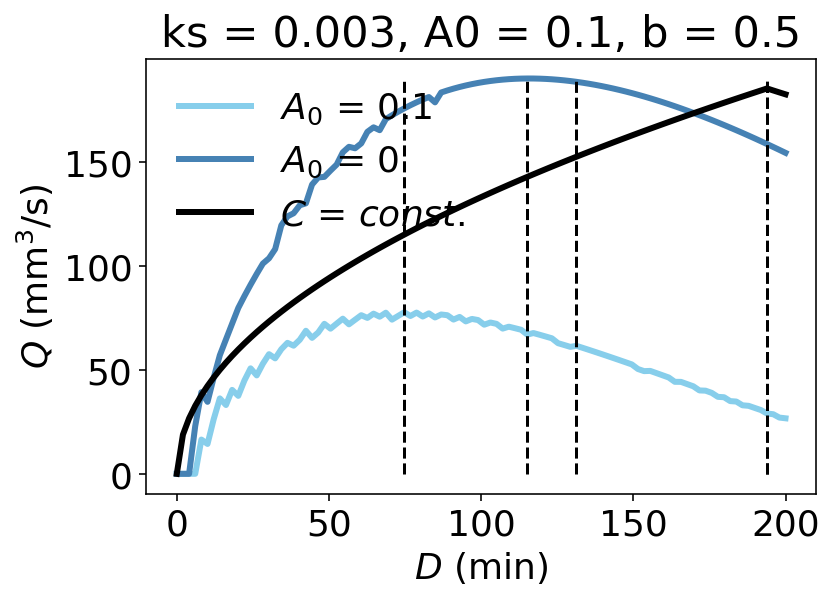

K =  0.5
96 96 65


In [28]:
# plots Q functions over duration under different loss specifications

ConstC = 0.4
for ks in [0.003]:#ksvals:
    for K in [0.5]:#Kvals:
        for A0 in [0.1]:#A0vals[ks]:
            for b in [0.5]:#sorted(bvals):
                print (location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                cross2 = -1
                tc2 = -1
                for i in range(len(df['Q'].tolist())):
                    if df['Q'].tolist()[i] == max(df['Q'].tolist()) and cross2 == -1:
                        cross2 = i
                    if df['A'].tolist()[i] == max(df['A'].tolist()) and tc2 == -1:
                        tc2 = i
                plt.plot(df['D']/60,df['Q'],label='$A_0$ = '+str(A0),c = 'skyblue',linewidth = 3)
                
                
                        
                df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(0.0)+"_"+str(b)+".csv")
                cross1 = -1
                tc1 = -1
                for i in range(len(df['Q'].tolist())):
                    if df['Q'].tolist()[i] == max(df['Q'].tolist()) and cross1 == -1:
                        cross1 = i
                    if df['A'].tolist()[i]==max(df['A'].tolist()) and tc1==-1:
                        tc1 = i
                plt.plot(df['D']/60,df['Q'],label='$A_0$ = 0',c = 'steelblue',linewidth = 3)
            
                
                cross = -1
                for i in range(len(df['tc'])):
                    if df['A'].tolist()[i]==max(df['A'].tolist()) and cross==-1:
                        cross = i
                if cross==0:
                    break
                Avals = []
                for i in range(len(df['A'].tolist())):
                    aa = max(df['A'].tolist())/cross*i
                    if aa>max(df['A'].tolist()):
                        aa = max(df['A'].tolist())
                    Avals = Avals + [aa]
                    
                Qvals = []
                for i in range(len(Avals)):
                    Qvals = Qvals + [df['I'].tolist()[i]*ConstC*Avals[i]]
                    
                plt.plot(df['D']/60,Qvals,label = '$C$ = $const.$',c = 'k',linewidth = 3)
                
                plt.legend(frameon=False,loc='upper left')
                plt.plot([df['D'].tolist()[cross]/60,df['D'].tolist()[cross]/60],[0,max(df['Q'].tolist())],c = 'k',linestyle = '--')
                plt.plot([df['D'].tolist()[cross1]/60,df['D'].tolist()[cross1]/60],[0,max(df['Q'].tolist())],c = 'k',linestyle = '--')
                plt.plot([df['D'].tolist()[cross2]/60,df['D'].tolist()[cross2]/60],[0,max(df['Q'].tolist())],c = 'k',linestyle = '--')
                plt.plot([df['D'].tolist()[tc1]/60,df['D'].tolist()[tc1]/60],[0,max(df['Q'].tolist())],c = 'k',linestyle = '--')
                plt.plot([df['D'].tolist()[tc2]/60,df['D'].tolist()[tc2]/60],[0,max(df['Q'].tolist())],c = 'k',linestyle = '--')
                plt.xlabel('$D$ (min)')
                plt.ylabel('$Q$ (mm$^3$/s)')
                plt.title('ks = '+str(ks)+', A0 = '+str(A0)+', b = '+str(b))
                plt.show()
                print ('K = ',K)
                print (cross,tc1,tc2)

                

Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_1.0_0.1_0.5.csv
ks = 0.003, b = 0.5, A0 = 0.1


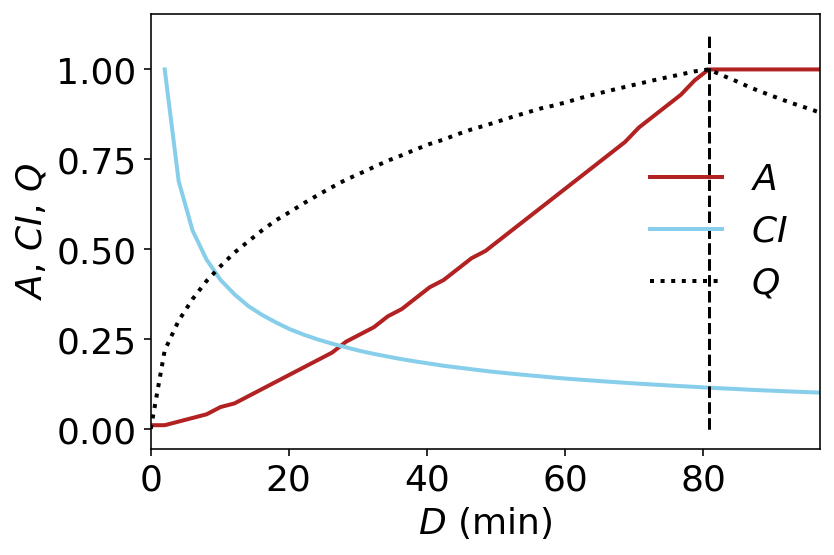

In [46]:
# plots Rational Method-like optimization

for ks in [0.003]:
    qv = []
    for K in [1.]:#Kvals:
        for A0 in [0.1]:
            row = []
            for b in [0.5]:#bvals:
                print (location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                Cvals = []
                for i in range(len(df['I'])):
                    Cvals = Cvals + [(df['I'].tolist()[i]-ks)/df['I'].tolist()[i]]
                cross = -1
                crossp=-1
                for i in range(len(df['A'].tolist())):
                    if df['A'].tolist()[i]==max(df['A'].tolist()) and cross==-1:
                        cross = i
                    if df['Q'].tolist()[i]==max(df['Q'].tolist()) and crossp==-1:
                        crossp=i
                Avals = []
                for i in range(len(df['A'].tolist())):
                    if i>=cross:
                        aa = (df['A'].tolist())[cross]
                    else:
                        aa = (df['A'].tolist()[cross])/(cross)*i
                    Avals = Avals + [aa]
                    qvs = []
                    for i in range(len(Avals)):
                        qvs = qvs +[df['C'].tolist()[i]*df['I'].tolist()[i]*Avals[i]]
                row = row+[max(qvs)]
                cvs = []
                for i in range(len(Avals)):
                    if Avals[i]!=0:
                        cvs = cvs + [qvs[i]/Avals[i]]
                    else:
                        cvs = cvs + [float('Nan')]
                try:
                    plotaa = [a/max(df['A'].tolist()) for a in df['A'].tolist()]
                except:
                    plotaa=df['A']
                try:
                    plotq = [q/max(qvs) for q in qvs]
                except: 
                    plotq = [0]*len(qvs)
                plotc = [c/cvs[1] for c in cvs]
                plt.plot(df['D']/60,plotaa,label = '$A$',c='firebrick',linewidth = 2)
                plt.plot(df['D']/60,plotc,label='$CI$',c='skyblue',linewidth=2)
                plt.plot(df['D']/60,plotq,label='$Q$',c='k',ls='dotted',linewidth = 2)
                plt.legend(frameon=False)
                print('ks = '+str(ks)+', b = '+str(b)+', A0 = '+str(A0))
                plt.plot([df['D'][cross]/60,df['D'][cross]/60],[0,1.1],c='k',ls='--')
                plt.plot([df['D'][crossp]/60,df['D'][crossp]/60],[0,1.1],c='k',ls='--')
                plt.xlabel('$D$ (min)')
                plt.ylabel('$A$, $CI$, $Q$')
                plt.xlim(0,df['D'][cross]/60*1.2)
                
                plt.show()
                
            qv = qv + [row]
     



In [57]:
# collect data for peak flow and tc/dc plots

qvals = {ks:{A:[] for A in A0vals[ks]} for ks in ksvals[:3]}
tcdcvals = {ks:{A:[] for A in A0vals[ks]} for ks in ksvals[:3]}
for ks in ksvals:
    if ks !=0.:
        for A0 in A0vals[ks]:
            qvals[ks][A0] = []
            tcdcvals[ks][A0] = []
            for K in Kvals:
                row = []
                tcrow = []
                for b in sorted(bvals):
                    print (location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                    df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                    
                    cross = -1
                    crossp = -1
                    for i in range(len(df['A'].tolist())):
                        if df['A'].tolist()[i]==100000 and cross==-1:
                            cross=i
                        if df['Q'].tolist()[i]==max(df['Q'].tolist()) and crossp==-1:
                            crossp=i
                    row = row+[max(df['Q'].tolist())]
                    if cross!=-1:
                        tcrow = tcrow + [df['D'].tolist()[cross]/df['D'].tolist()[crossp]]
                    else:
                        tcrow = tcrow + [float('nan')]
                    if abs(cross-crossp)<2 or abs(df['D'].tolist()[cross]-df['D'].tolist()[crossp])/df['D'].tolist()[cross]<0.03:
                        cross = crossp
                    
                    
                    print (tcrow[-1])
                        
                        
                qvals[ks][A0] = qvals[ks][A0]+[[qq for qq in row]]
                tcdcvals[ks][A0] = tcdcvals[ks][A0] + [tcrow]

Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_0.5_1.0_0.35.csv
485.80808080808083
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_0.5_1.0_0.425.csv
nan
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_0.5_1.0_0.5.csv
nan
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_0.5_1.0_0.575.csv
nan
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_0.5_1.0_0.65.csv
nan
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_1.0_1.0_0.35.csv
4.328755912501908
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_1.0_1.0_0.425.csv
728.2121212121212
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_1.0_1.0_0.5.csv
364.6060606060606
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_1.0_1.0_0.575.csv
nan
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_1.0_1.0_0.65.csv
nan
Desktop/variable_c_da

1.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_5.0_0.1_0.5.csv
0.9697196856117395
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_5.0_0.1_0.575.csv
1.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_5.0_0.1_0.65.csv
0.9879553997397715
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_10.0_0.1_0.35.csv
1.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_10.0_0.1_0.425.csv
1.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_10.0_0.1_0.5.csv
1.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_10.0_0.1_0.575.csv
1.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_10.0_0.1_0.65.csv
0.9859233473029606
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_0.5_0.0_0.35.csv
1.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_0.5_0.0_0.425.csv
0.9736899230585379

ks = 0.05 A0 =  1.0


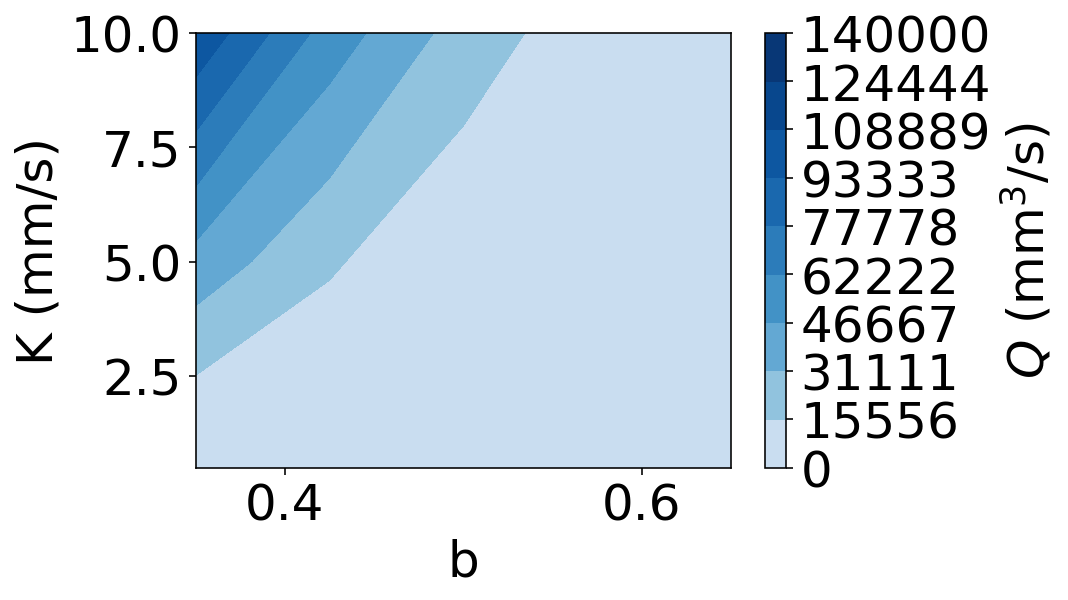

ks = 0.05 A0 =  0.1


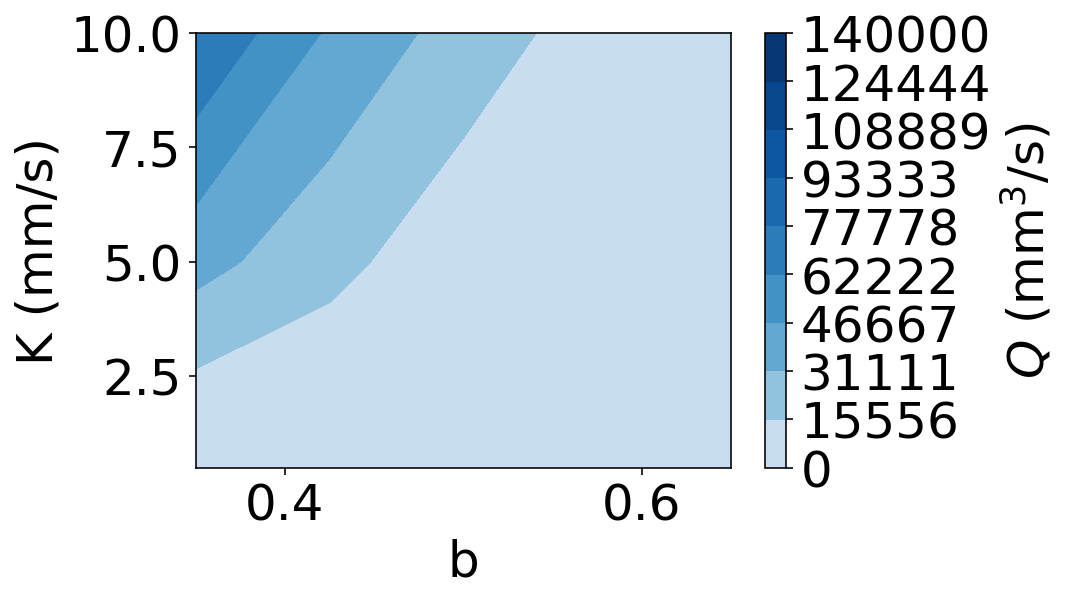

ks = 0.05 A0 =  0.0


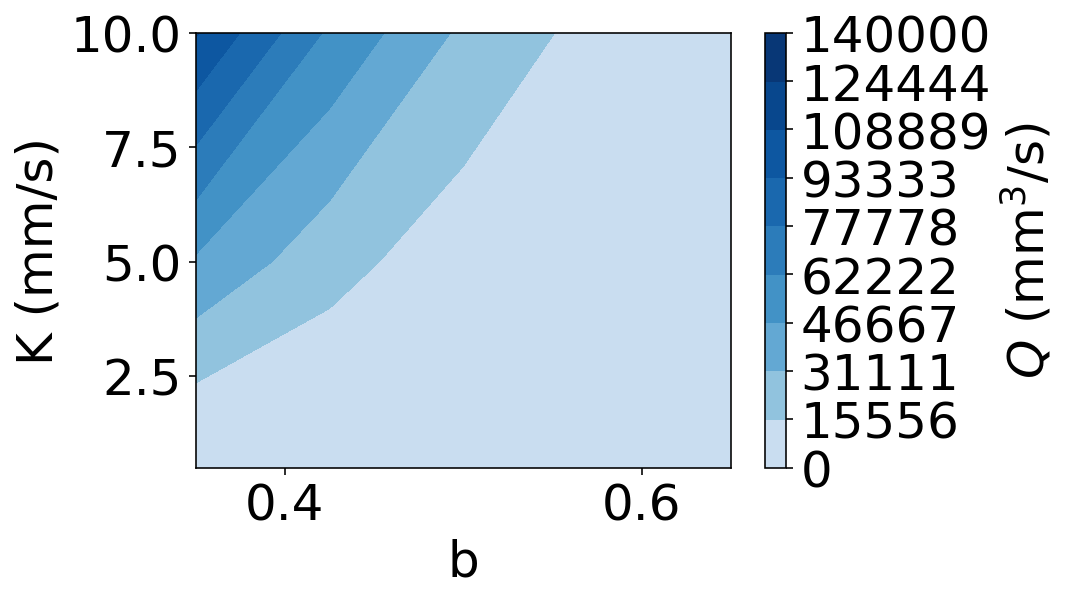

ks = 0.003 A0 =  1.0


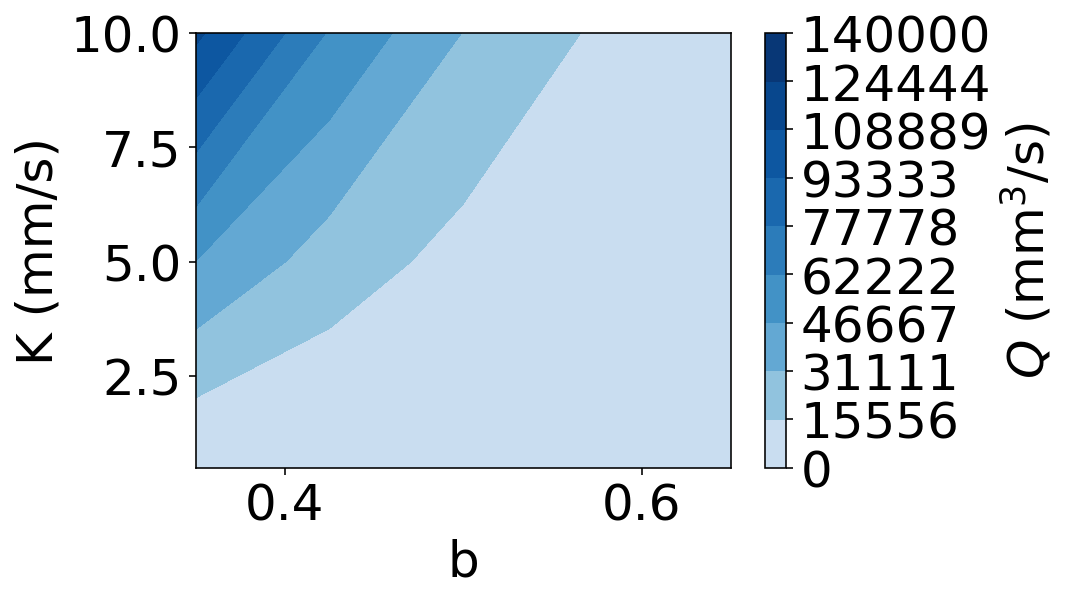

ks = 0.003 A0 =  0.1


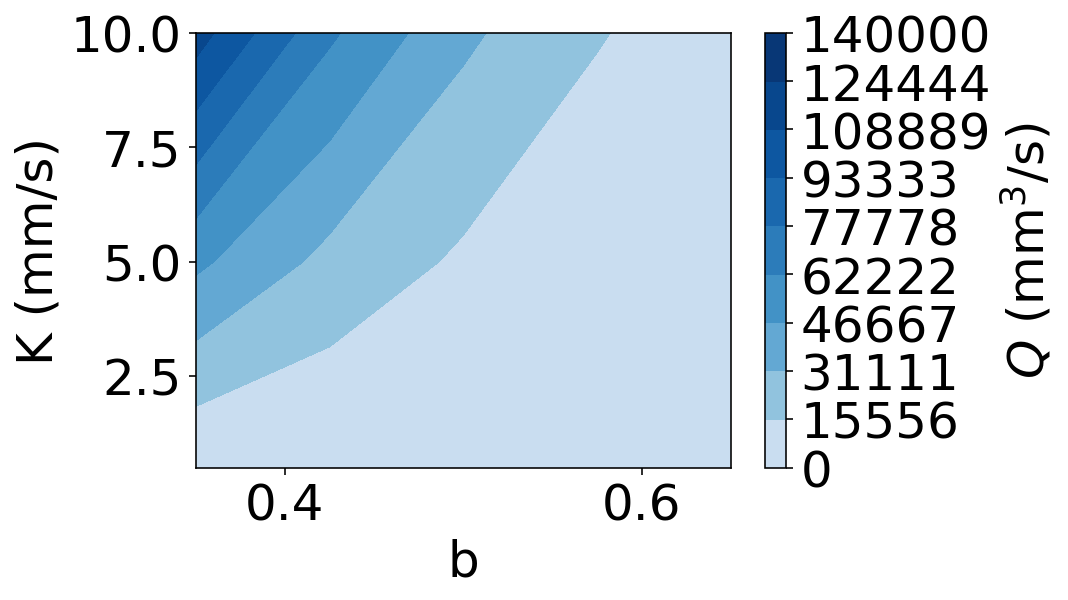

ks = 0.003 A0 =  0.0


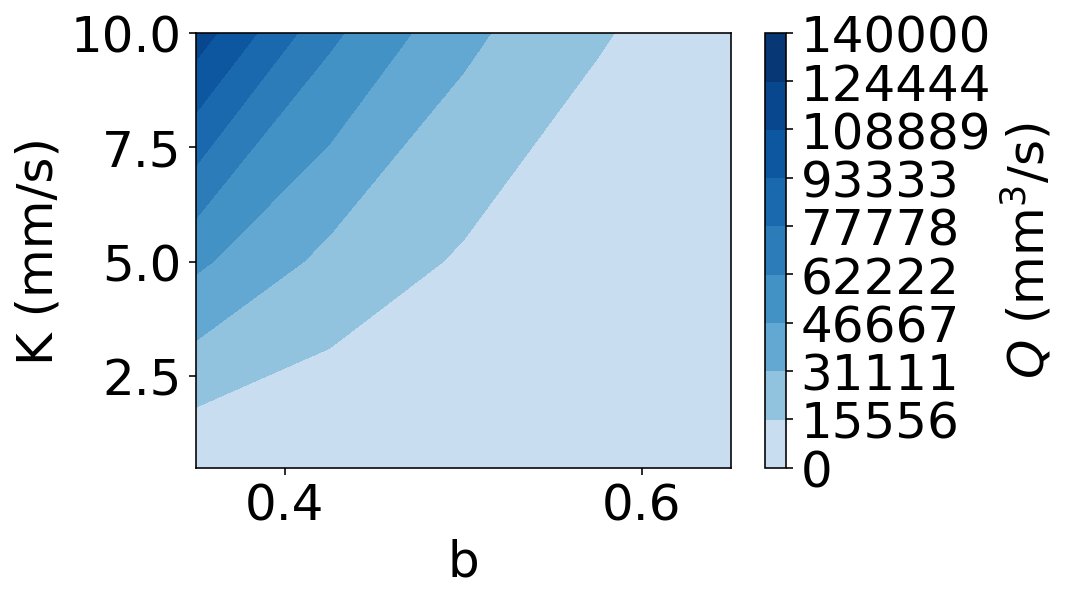

ks = 0.0001 A0 =  0.1


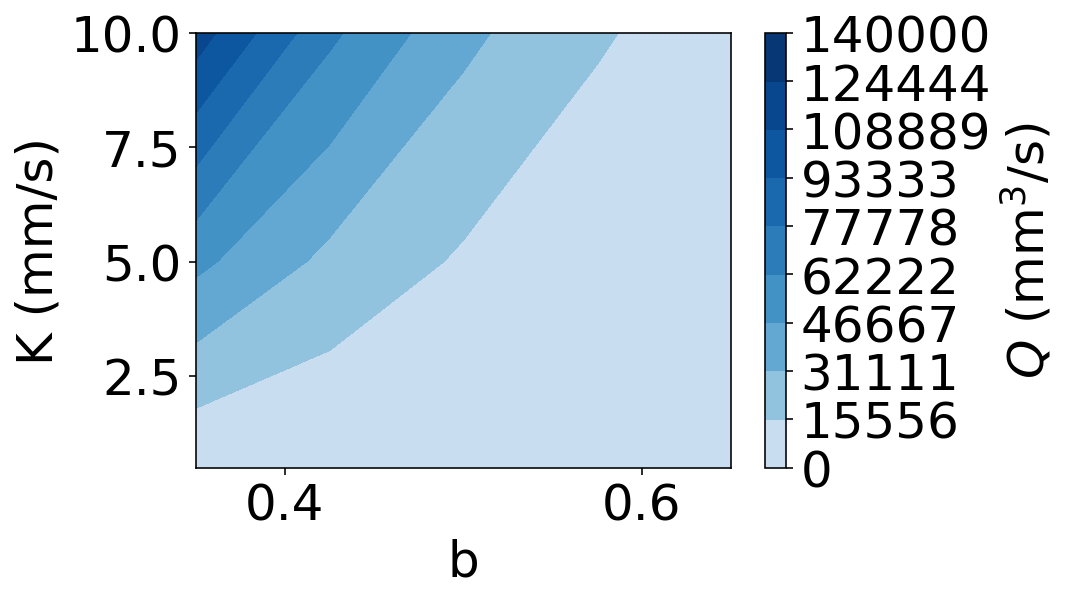

ks = 0.0001 A0 =  0.01


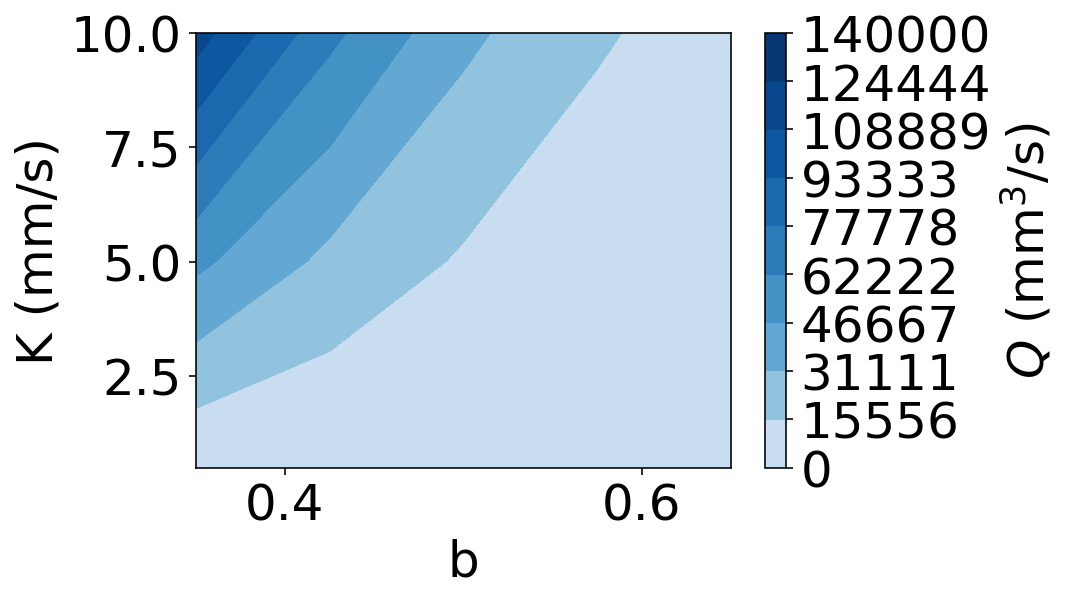

ks = 0.0001 A0 =  0.0


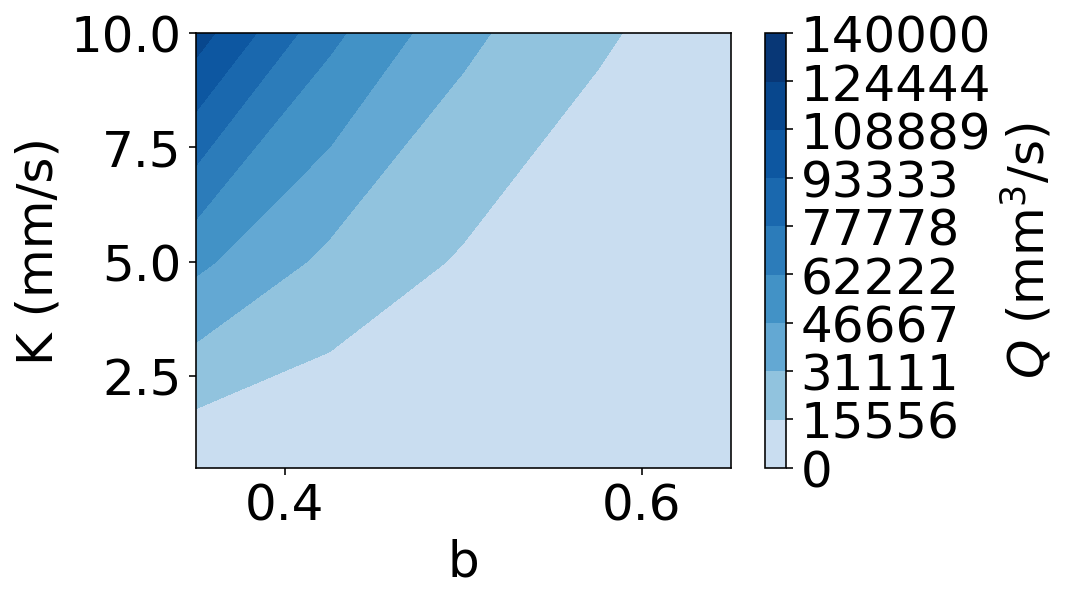

In [58]:
# plot Maximum Peak Flow 
matplotlib.rcParams.update({'font.size': 25}) 

for ks in qvals.keys():
    for A0 in qvals[ks].keys():
        x = sorted(bvals)
        y = Kvals
        X, Y = nm.meshgrid(x,y)
        fig,ax=plt.subplots(1,1)
        CL=plt.contourf(X,Y, qvals[ks][A0],cmap='Blues',norm=colors.PowerNorm(gamma=0.5),levels=nm.linspace(0,140000,10))
        CB =fig.colorbar(CL,ax=ax)
        CB.set_label('$Q$ (mm$^3$/s)')
        plt.xlabel('b')
        plt.ylabel('K (mm/s)')
        print ('ks = ' + str(ks), 'A0 = ',A0)
        plt.show()

In [59]:
#collect C data for plots

cvals = {ks:{A:[] for A in A0vals[ks]} for ks in ksvals[:3]}
tcdcvals = {ks:{A:[] for A in A0vals[ks]} for ks in ksvals[:3]}
for ks in ksvals:
    if ks !=0.:
        for A0 in A0vals[ks]:
            tcdc = []
            cvals[ks][A0] = []
            tcdcvals[ks][A0] = []
            for K in Kvals:
                row = []
                tcrow = []
                for b in sorted(bvals):
                    print (location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                    df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                    
                    cross = -1
                    crossp = -1
                    for i in range(len(df['A'].tolist())):
                        if df['A'].tolist()[i]>=99999 and cross==-1:
                            cross=i
                        if df['Q'].tolist()[i]==max(df['Q'].tolist()) and crossp==-1:
                            crossp=i
                    if False:#cross==-1:
                        tcrow = tcrow+ [float('nan')]
                    else:
                        tcrow = tcrow + [df['D'].tolist()[cross]/df['D'].tolist()[crossp]]
                        print (df['D'].tolist()[cross],df['D'].tolist()[crossp])
                    
                    if df['A'].tolist()[crossp]==0 or df['I'].tolist()[crossp]==0:
                        row = row + [float('Nan')]
                    
                    else: 
                        cv = (df['Q'].tolist()[crossp])/(df['A'].tolist()[crossp]*df['I'].tolist()[crossp])
                        if cv>1 and cv<1.1:
                            cv=1
                        elif cv>=1.1:
                            cv = float('Nan')
                            print (df['Q'].tolist()[crossp],df['A'].tolist()[crossp],df['I'].tolist()[crossp])
                        row = row+[cv]
                                        
                   
                        
                        
                cvals[ks][A0] = cvals[ks][A0]+[row]
                tcdcvals[ks][A0] = tcdcvals[ks][A0] + [tcrow]
                tcdc = tcdc + [tcrow]

Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_0.5_1.0_0.35.csv
485.80808080808083 1.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_0.5_1.0_0.425.csv
12000.0 1.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_0.5_1.0_0.5.csv
12000.0 1.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_0.5_1.0_0.575.csv
12000.0 1.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_0.5_1.0_0.65.csv
12000.0 1.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_1.0_1.0_0.35.csv
3152.2525252525256 728.2121212121212
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_1.0_1.0_0.425.csv
728.2121212121212 1.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_1.0_1.0_0.5.csv
364.6060606060606 1.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.05_1.0_1.0_0.575.csv
12000.0 1.0
Desktop/variable_c_data/rational_longhill_

455.3636363636364 455.3636363636364
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_10.0_1.0_0.425.csv
632.060606060606 632.060606060606
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_10.0_1.0_0.5.csv
884.4848484848485 884.4848484848485
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_10.0_1.0_0.575.csv
1389.333333333333 1389.333333333333
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_10.0_1.0_0.65.csv
2500.0 2500.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_0.5_0.1_0.35.csv
3031.050505050505 3031.050505050505
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_0.5_0.1_0.425.csv
5212.686868686869 5212.686868686869
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_0.5_0.1_0.5.csv
12000.0 4485.474747474746
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.003_0.5_0.1_0.575.csv
5697.49494949495 1091.818181

9818.363636363636 9939.565656565655
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.0001_0.5_0.01_0.65.csv
12000.0 12000.0
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.0001_1.0_0.01_0.35.csv
1819.030303030303 1819.030303030303
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.0001_1.0_0.01_0.425.csv
2546.2424242424245 2546.2424242424245
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.0001_1.0_0.01_0.5.csv
3758.262626262626 3758.262626262626
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.0001_1.0_0.01_0.575.csv
5818.69696969697 5818.69696969697
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.0001_1.0_0.01_0.65.csv
9818.363636363636 9939.565656565655
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.0001_5.0_0.01_0.35.csv
687.6969696969696 687.6969696969696
Desktop/variable_c_data/rational_longhill_extralong/rational_info_0.0001_5.0_0.01_0.425.csv
93

ks = 0.05 A0 =  1.0


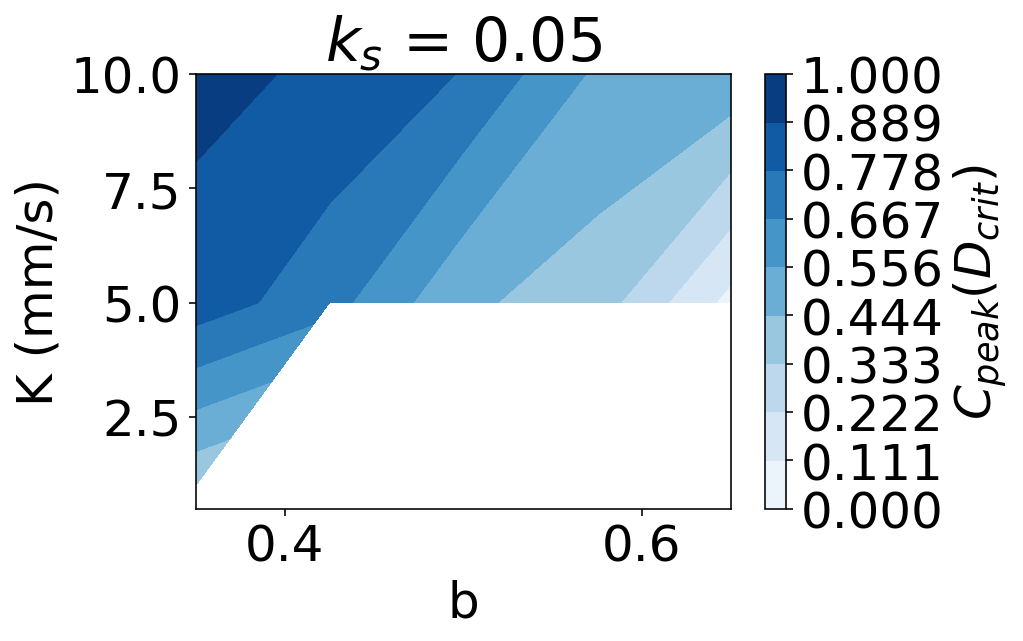

ks = 0.05 A0 =  0.1


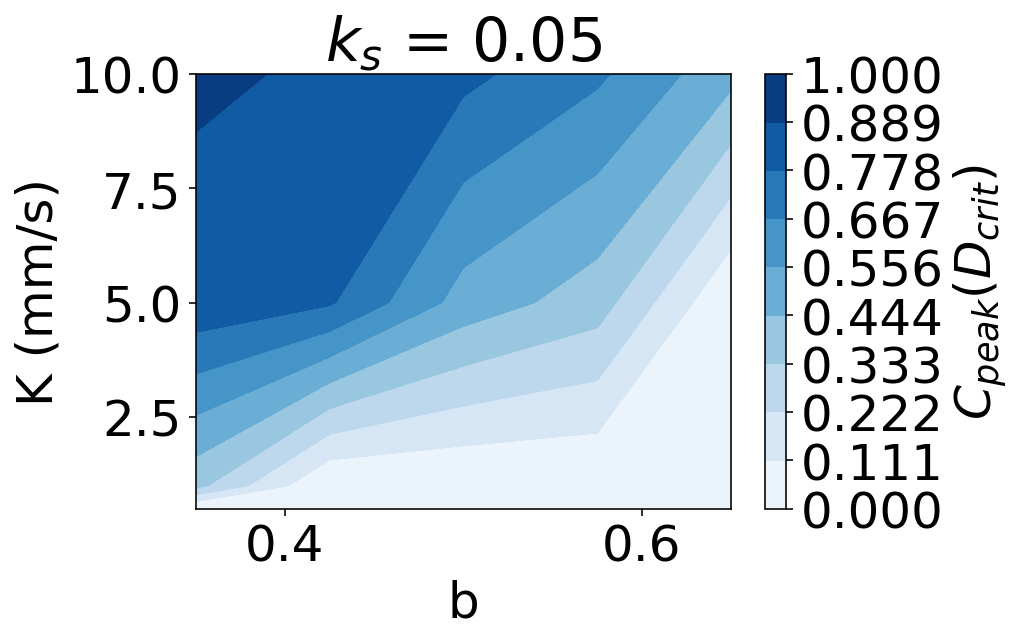

ks = 0.05 A0 =  0.0


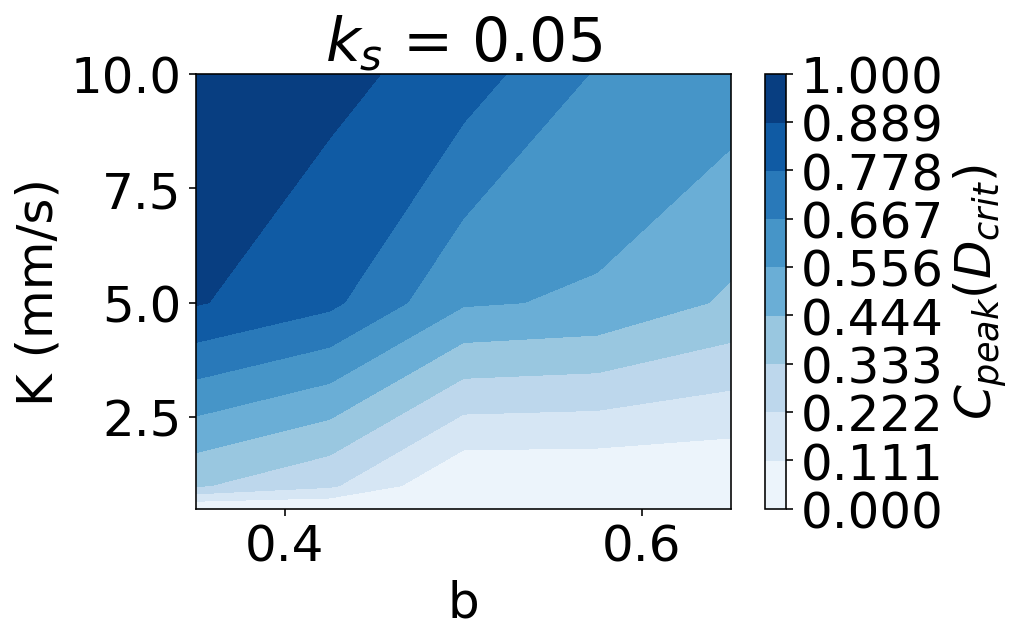

ks = 0.003 A0 =  1.0


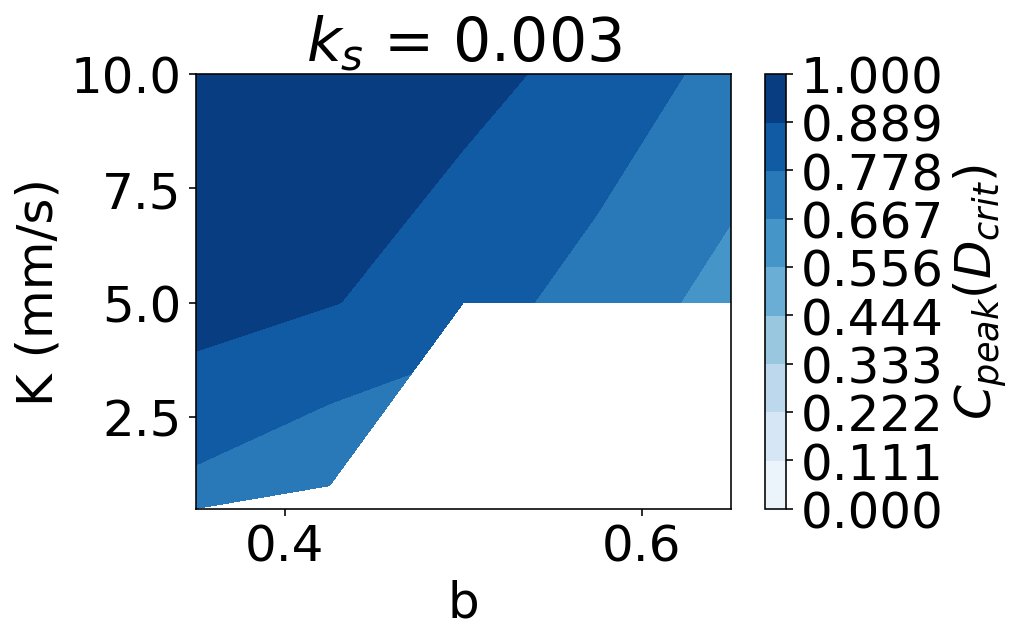

ks = 0.003 A0 =  0.1


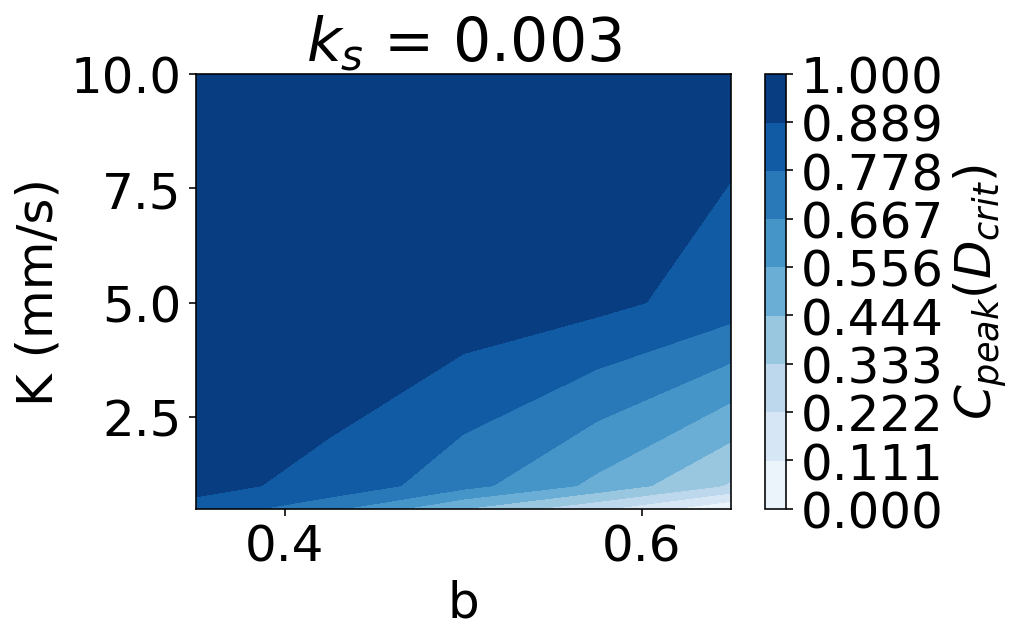

ks = 0.003 A0 =  0.0


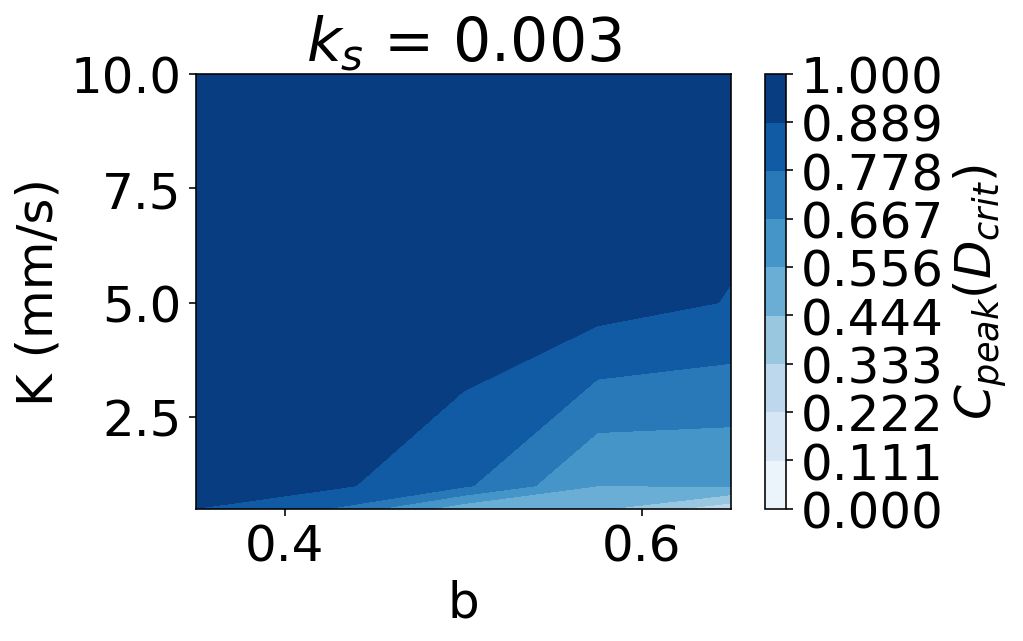

ks = 0.0001 A0 =  0.1


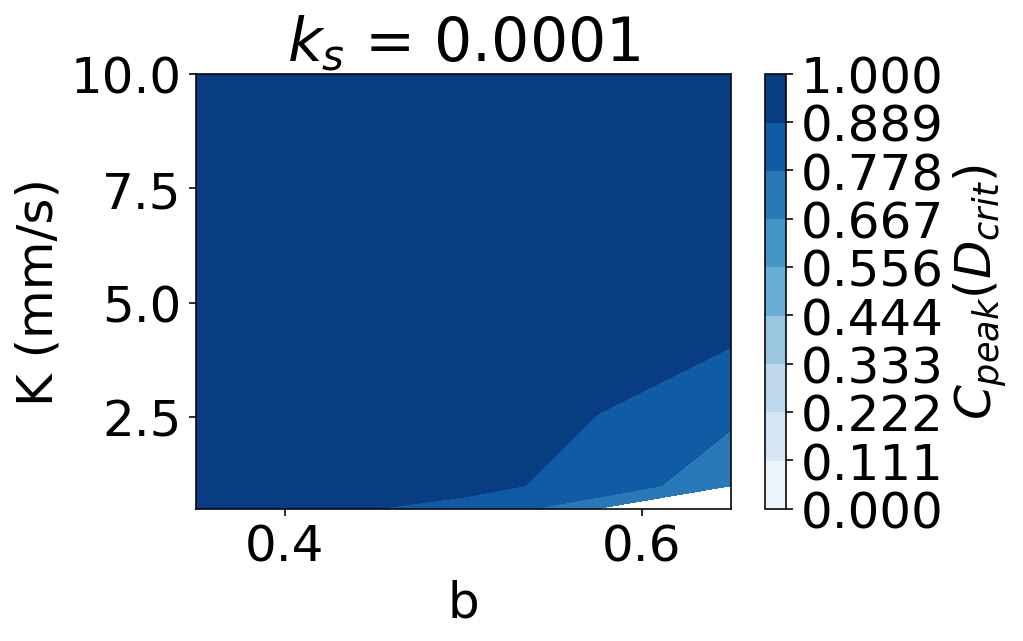

ks = 0.0001 A0 =  0.01


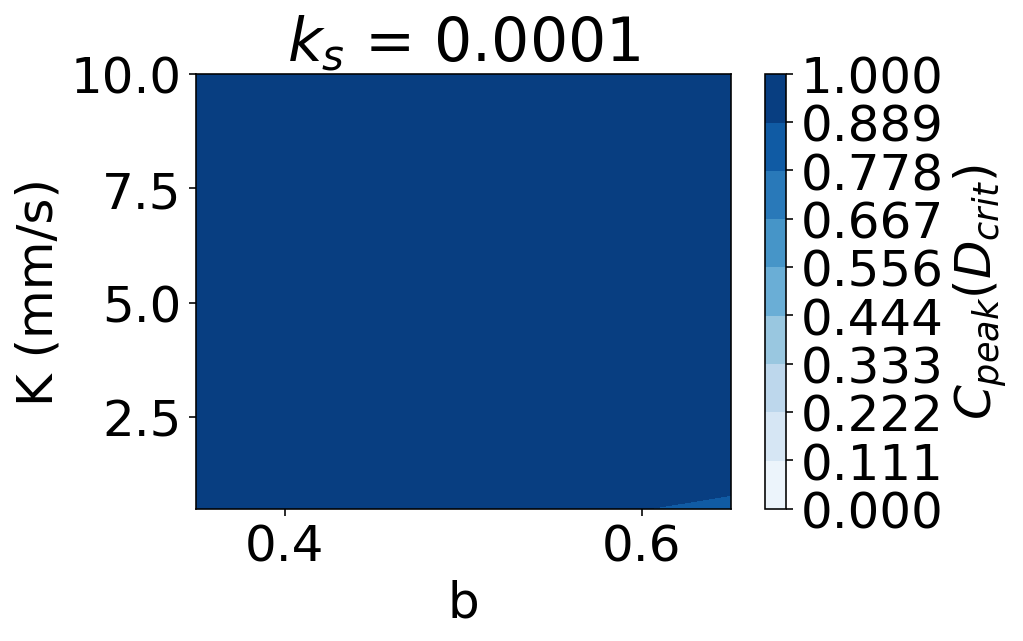

ks = 0.0001 A0 =  0.0


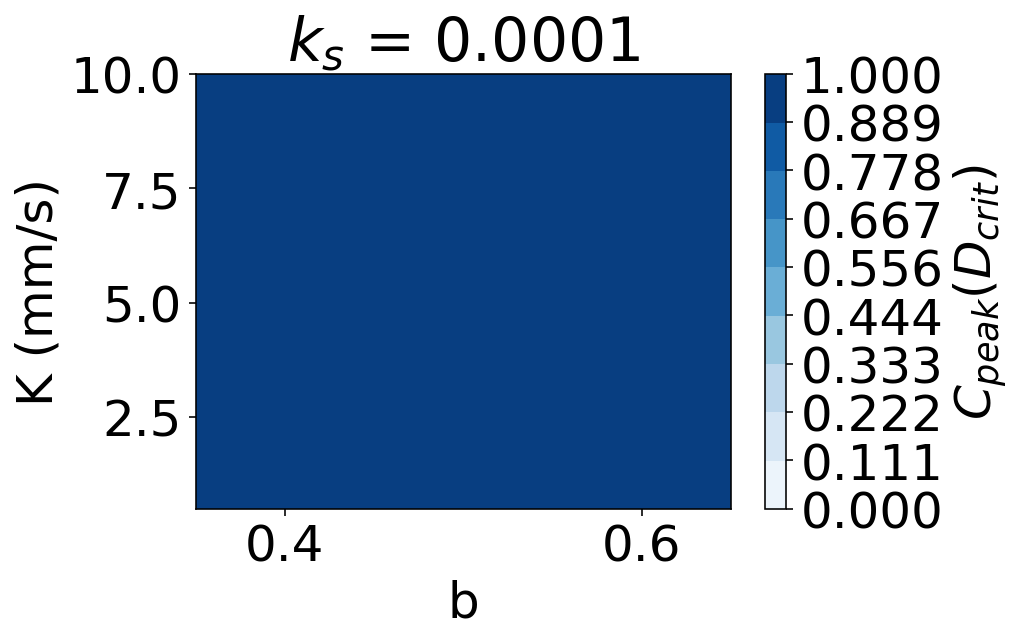

In [60]:
# plot Cpeak(Dcrit)
matplotlib.rcParams.update({'font.size': 25})

for ks in cvals.keys():
    for A0 in cvals[ks].keys():
        x = sorted(bvals)
        y = Kvals
        X, Y = nm.meshgrid(x,y)
        fig,ax=plt.subplots(1,1)
        CL=plt.contourf(X,Y, cvals[ks][A0],cmap='Blues',vmin=0,vmax=1,levels=nm.linspace(0,1,10))#norm=colors.PowerNorm(gamma=0.2,vmin=0,vmax=1))
        CB =fig.colorbar(CL,ax=ax)
        CB.set_label('$C_{peak}(D_{crit})$')
        plt.xlabel('b')
        plt.ylabel('K (mm/s)')
        plt.title('$k_s$ = '+str(ks))
        print ('ks = ' + str(ks), 'A0 = ',A0)
        plt.show()

ks = 0.05 A0 =  0.0


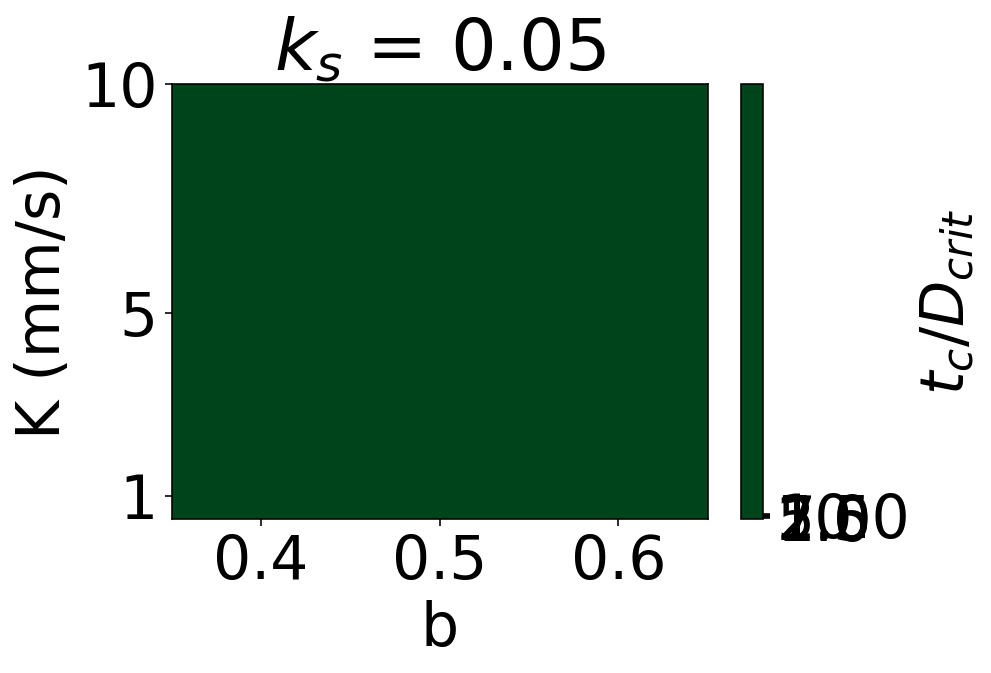

ks = 0.05 A0 =  0.1


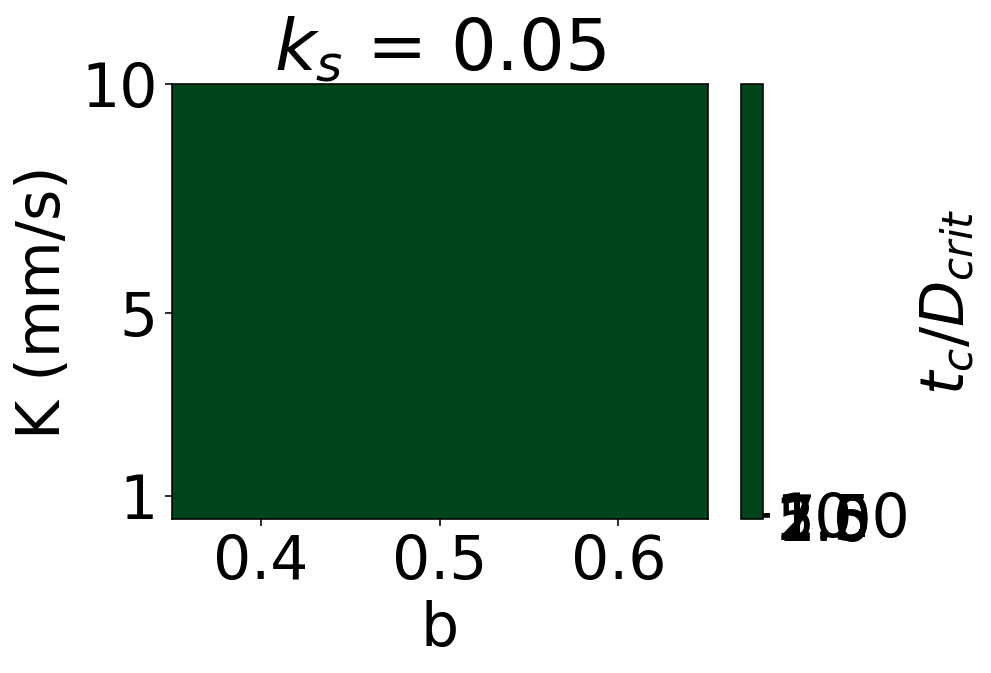

ks = 0.05 A0 =  1.0


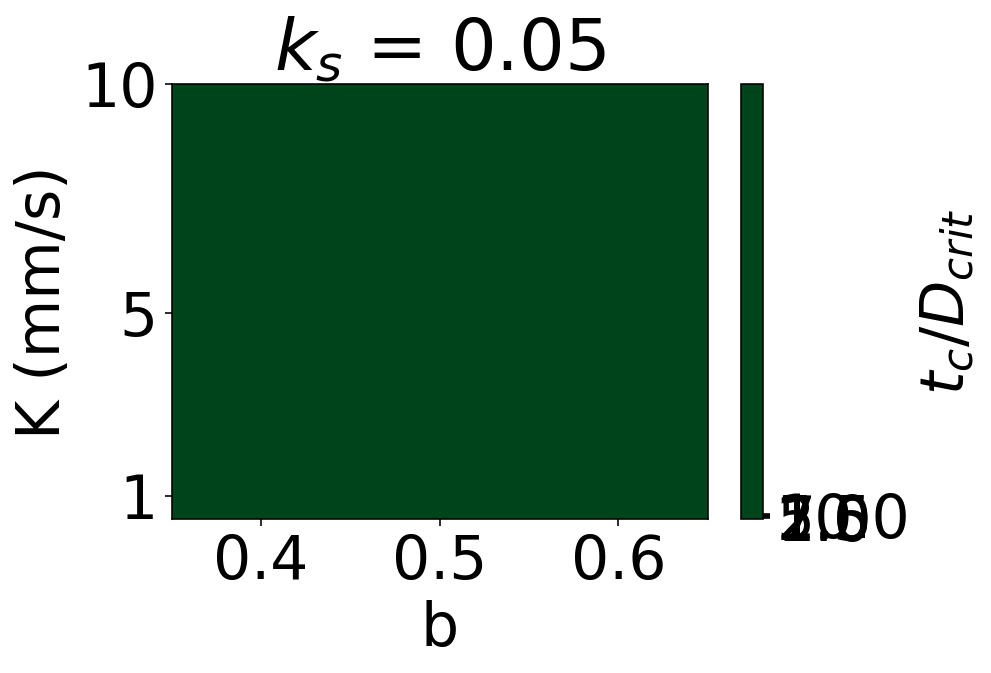

ks = 0.003 A0 =  0.0


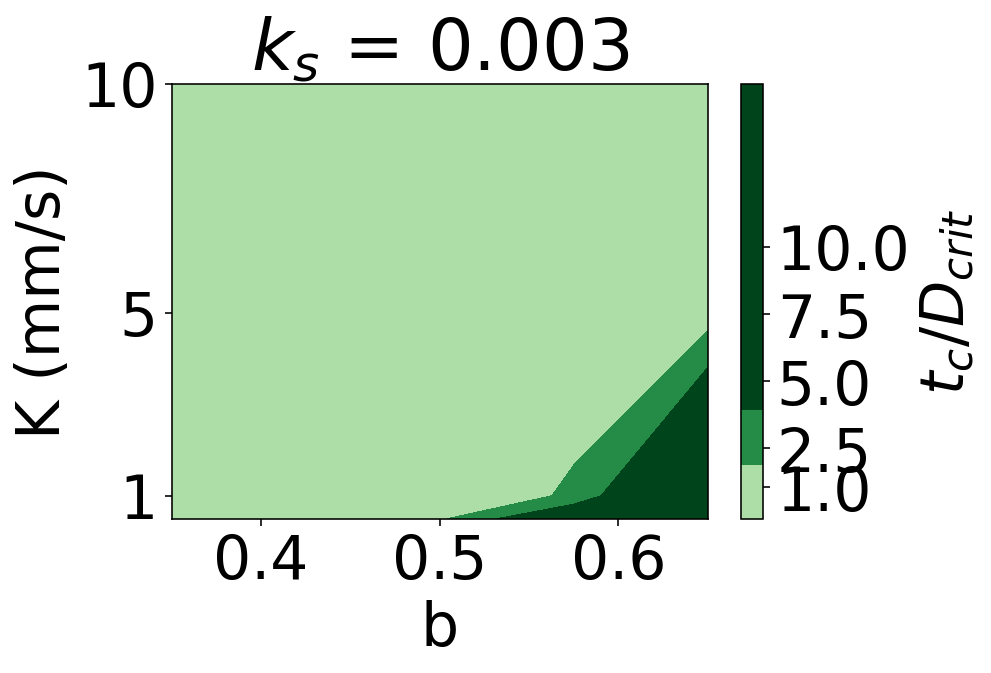

ks = 0.003 A0 =  0.1


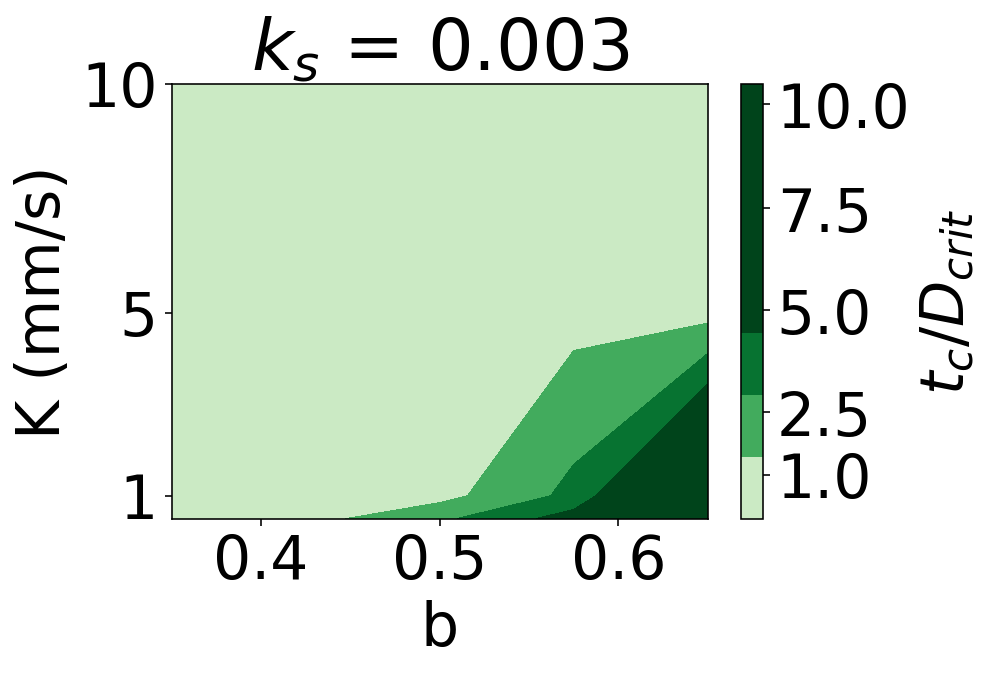

ks = 0.003 A0 =  1.0


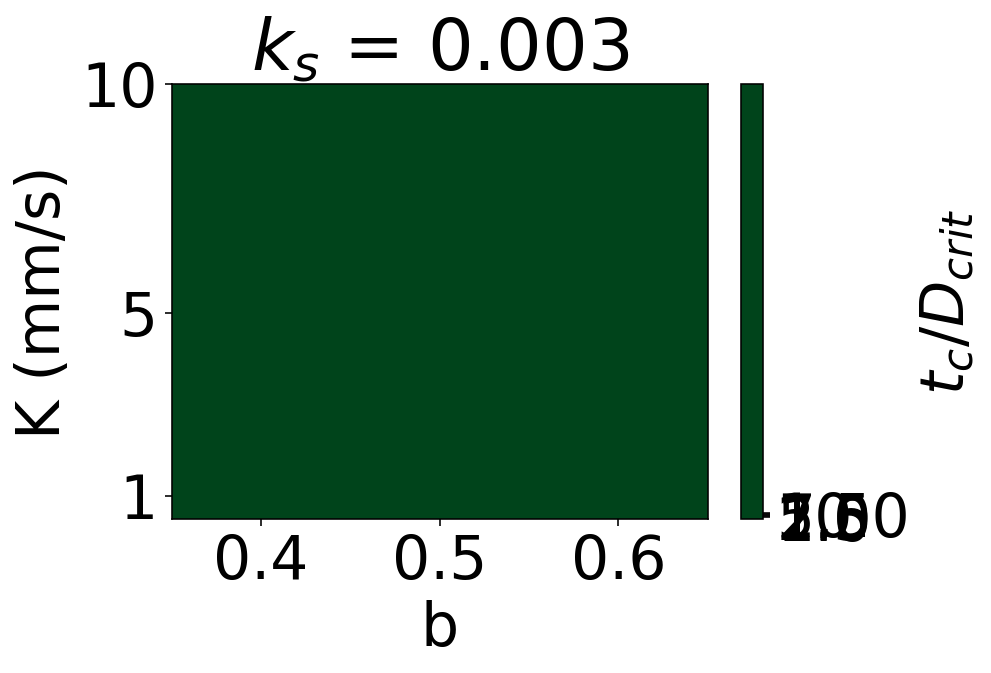

ks = 0.0001 A0 =  0.0


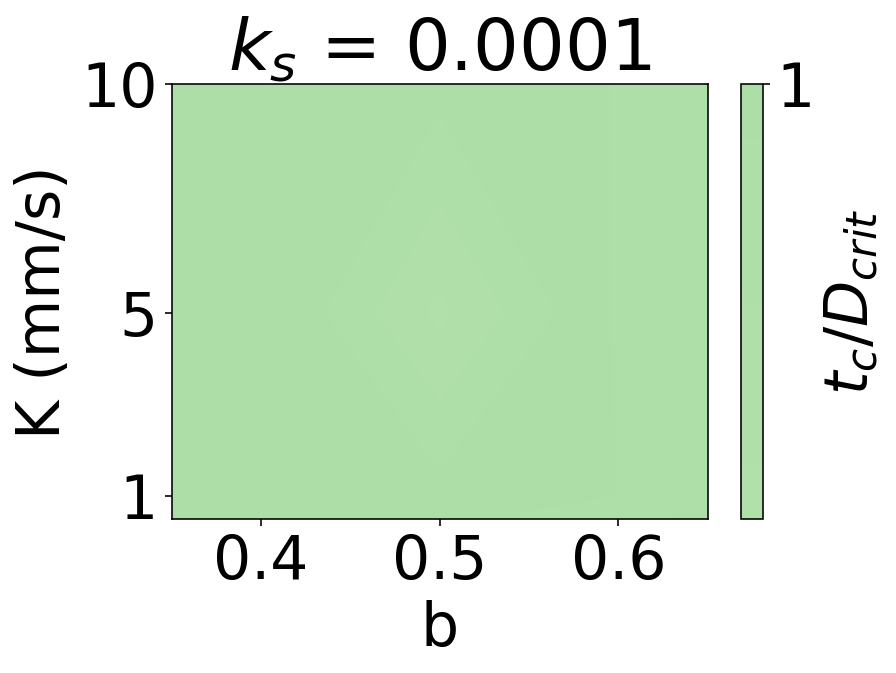

ks = 0.0001 A0 =  0.01


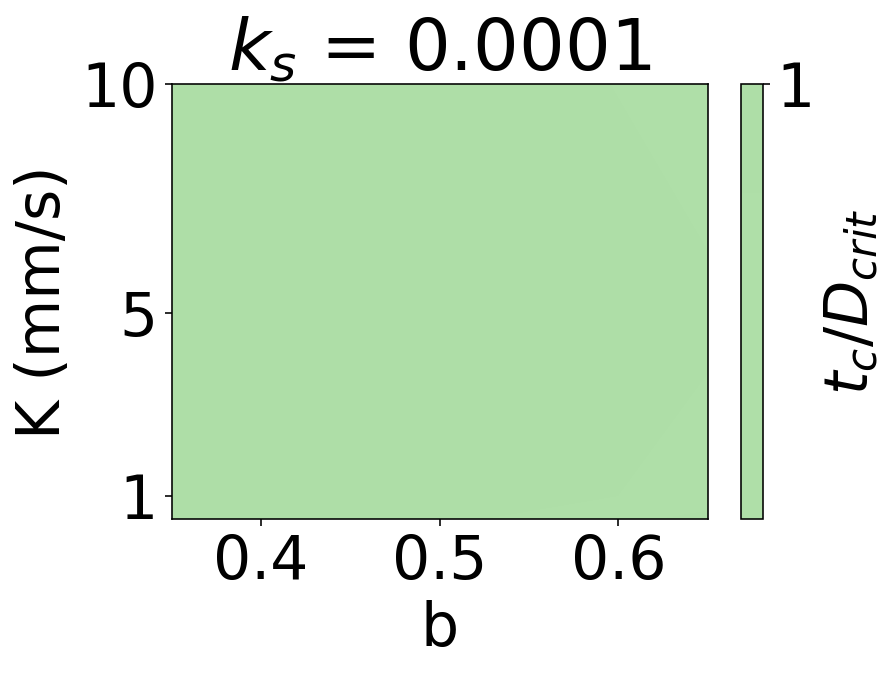

ks = 0.0001 A0 =  0.1


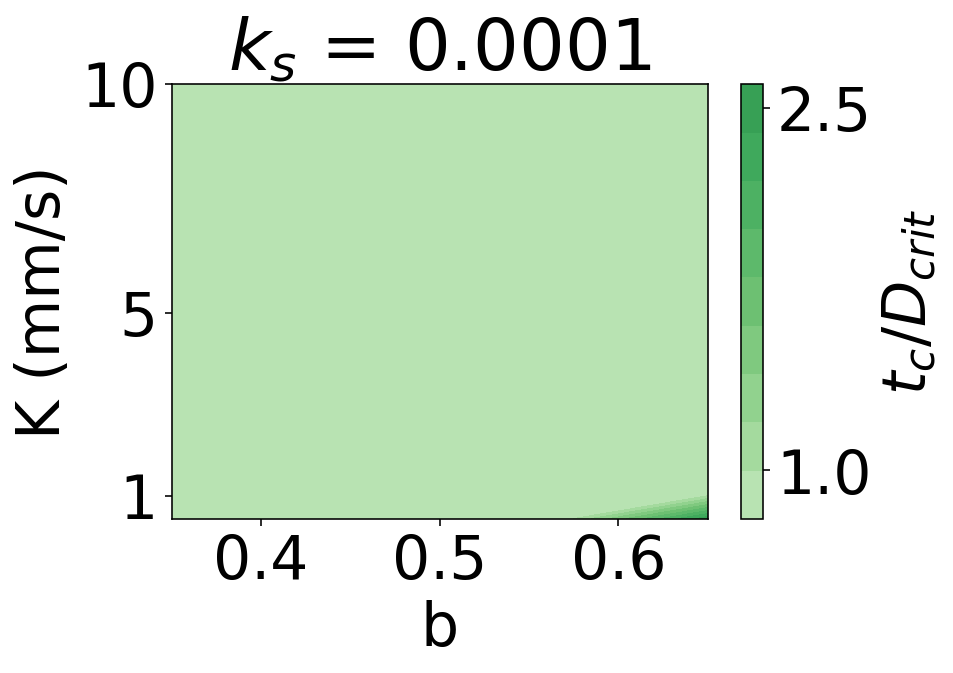

In [61]:
#tc/Dcrit
matplotlib.rcParams.update({'font.size': 30})
for ks in tcdcvals.keys():
    for A0 in sorted(tcdcvals[ks].keys()):
        x = sorted(bvals)
        y = Kvals
        X, Y = nm.meshgrid(x,y)
        fig,ax=plt.subplots(1,1)
        CL=plt.contourf(X,Y, tcdcvals[ks][A0],cmap='Greens',norm=colors.PowerNorm(gamma=0.5))#,levels = nm.linspace(0,10,50),vmin=1,vmax=10)#norm=colors.LogNorm(vmin=1,vmax=1000))
        
        CL.set_clim(0.5,5)
        CB =fig.colorbar(CL,ax=ax,ticks=[1,2.5,5,7.5,10])
        CB.set_label('$t_c$/$D_{crit}$')
        plt.xlabel('b')
        plt.ylabel('K (mm/s)')
        plt.xticks([0.4,0.5,0.6])
        plt.yticks([1,5,10])
        print ('ks =',ks, "A0 = ",A0)
        plt.title('$k_s$ = '+str(ks))
        
        plt.show()

In [66]:
# collect data for multivariate regression

#K
diffQ1 = []
diffK1 = []
diffb1 = []
diffks1 = []
diffA01 = []
#b
diffQ2 = []
diffK2 = []
diffb2 = []
diffks2 = []
diffA02 = []
#ks
diffQ3 = []
diffK3 = []
diffb3 = []
diffks3 = []
diffA03 = []
#A0
diffQ4 = []
diffK4 = []
diffb4 = []
diffks4 = []
diffA04 = []

baseK = max(Kvals)
baseb = min(bvals)
baseks = 0.003#max(ksvals)
baseA0 = 0.0#min(A0vals[baseks])
basefile = location+name+str(baseks)+"_"+str(baseK)+"_"+str(baseA0)+"_"+str(baseb)+".csv"
dfbase = pd.read_csv(basefile)
baseQ = max(dfbase['Q'])

diffQ = []
diffK = []
diffks = []
diffA0 = []
diffb = []


for b in bvals:
    for ks in ksvals:
        aval=-1
        for A0 in sorted(A0vals[ks]):
            for K in Kvals:#[0.72,1.0,2.4,5.,7.2,10.]:#Kvals[ks]:
                
                if A0==0 and ks==0:
                    #break
                    diffQ = diffQ + [0.0]
                    diffK = diffK + [0.0]#/K)]
                    diffb = diffb + [0]
                    diffks = diffks + [0]
                    diffA0 = diffA0 + [0]
                elif A0==0:
                    try:
                        dff = pd.read_csv(location+name+str(0.0)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                        df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                        diffQ3 = diffQ3 + [(max(df['Q'])-max(dff['Q']))/(max(df['Q'])+max(dff['Q']))]
                        diffK3 = diffK3 + [0.]
                        diffb3 = diffb3 + [0]
                        diffks3 = diffks3 + [ks]
                        diffA03 = diffA03 + [0.]
                    except:
                        print ('ks error')
                else:
                    #break
                    try:
                        dff = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(0.0)+"_"+str(b)+".csv")
                        df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                        diffQ4 = diffQ4 + [((max(df['Q']))-max(dff['Q']))/(max(df['Q'])+max(dff['Q']))]
                        diffK4 = diffK4 + [0.]
                        diffb4 = diffb4 + [0.]
                        diffks4 = diffks4 + [0.]
                        diffA04 = diffA04 + [aval]

                    except:
                        print ('A0 error')
                    try:
                        dff = pd.read_csv(location+name+str(0.0)+"_"+str(K)+"_"+str(0.0)+"_"+str(b)+".csv")
                        df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                        diffQ = diffQ + [((max(df['Q']))-max(dff['Q']))/(max(df['Q'])+max(dff['Q']))]
                        diffK = diffK + [0.]
                        diffb = diffb + [0]
                        diffks = diffks + [ks]
                        diffA0 = diffA0 + [aval]
                    except:
                        print ('A0 and ks error')
                        print (location+name+str(0.0)+"_"+str(K)+"_"+str(0.0)+"_"+str(b)+".csv")
                        print (location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")

                for K1 in [5.0]:#Kvals[ks]:
                    try:
                        dff = pd.read_csv(location+name+str(ks)+"_"+str(K1)+"_"+str(A0)+"_"+str(b)+".csv")
                        df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                        diffQ1 = diffQ1 + [(max(df['Q'])-max(dff['Q']))/(max(df['Q'])+max(dff['Q']))]
                        diffK1 = diffK1 + [(K-K1)/(K+K1)]#/K)]
                        diffb1 = diffb1 + [0]
                        diffks1 = diffks1 + [0]
                        diffA01 = diffA01 + [0]
                    except:
                        print ('K error')
                for b1 in bvals[2:3]:
                    try:
                        dff = pd.read_csv("Desktop/"+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b1)+".csv")
                        df = pd.read_csv("Desktop/"+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                        diffQ2 = diffQ2 + [(max(df['Q'])-max(dff['Q']))/(max(df['Q'])+max(dff['Q']))]
                        diffK2 = diffK2 + [0.]#/K)]
                        diffb2 = diffb2 + [(b-b1)/(b+b1)]
                        diffks2 = diffks2 + [0]
                        diffA02 = diffA02 + [0]
                    except:
                        print ('b error')

            aval+=1




b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error
b error


Intercept: 
 [-0.04352457]
Coefficients: 
 [[ 1.22260170e+00 -8.83737528e-14 -1.12771489e+01 -2.87886523e-01]]


Text(0.5, 0, '$\\~{K}$, $\\~{b}$, $\\~{k_s}$, $\\~{A_0}$')

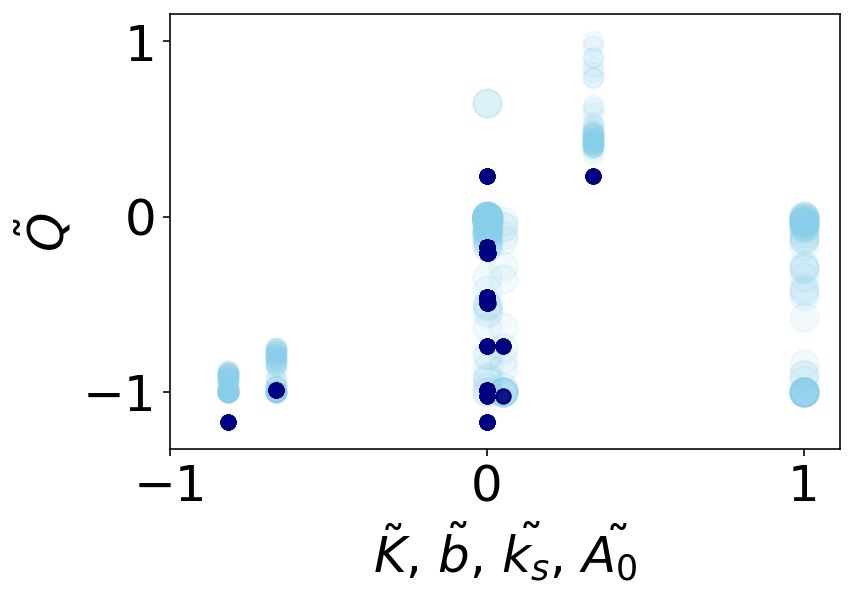

In [67]:
# run and plot regression with data

diffks5 = []
diffA05 = []
for q in diffks3:
    diffks5 = diffks5 + [q]#nm.log(abs(q))]
    
for A in diffA04:
    diffA05 = diffA05 + [((A))]
    
Qlist = diffQ+diffQ1+diffQ2+diffQ3+diffQ4
    
deviations = {'K':diffK+diffK1+diffK2+diffK3+diffK4,
              'b':diffb+diffb1+diffb2+diffb3+diffb4,'ks':diffks+diffks1+diffks2+diffks5+diffks4,
              'A0':diffA0+diffA01+diffA02+diffA03+diffA04}

df = pd.DataFrame(deviations,columns=['K','b','ks','A0']) 

X = df[['K','b','ks','A0']] 
Y = pd.DataFrame(Qlist,columns=['Q'])



matplotlib.rcParams.update({'font.size': 25})
ss=100

plt.scatter(diffA04,diffQ4,s=ss*2,c='skyblue',alpha=0.1)
plt.xlabel('$\~{A_0}$')
#plt.xscale('log')
#plt.xlim(0.00005,4.)
plt.ylabel('$\~{Q}$')

#plt.ylim(-10,10)
###plt.show()

#print diffK1
#print diffQ1
plt.scatter(diffK1,diffQ1,s=ss,c='skyblue',alpha=0.1)
plt.xlabel('$\~{K}$')
plt.ylabel('$\~{Q}$')
#plt.ylim(-10,10)
###plt.show()

plt.scatter(diffb2,diffQ2,s=ss*2,c='skyblue',alpha=0.1)
plt.xlabel('$\~{b}$')
plt.ylabel('$\~{Q}$')
#plt.ylim(-10,10)
###plt.show()

#print diffks3
plt.scatter(diffks3,diffQ3,s=ss*2,c='skyblue',label='actual',alpha=0.1)
plt.xlabel('$\~{k_s}$')
plt.ylabel('$\~{Q}$')
#plt.xscale('log')
#plt.xlim(nm.exp(0.00001),nm.exp(0.1))
#plt.ylim(-10,10)
###plt.show()





# with sklearn

X = df[['K','b','ks','A0']].values.reshape(-1,4)
Y = pd.DataFrame(Qlist).values.reshape(-1,1)

import sklearn.linear_model as slm
regr = slm.LinearRegression()
regr.fit(X, Y)

#print X.head()

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

#print (X.regr.coef_)
def plotfun(X):
    newcol=float(regr.intercept_)+X*regr.coef_
    newnew = []
    for row in newcol:
        newnew = newnew + [sum(row)]
    return newnew

y_hat = plotfun(X)

plt.scatter([row[0] for row in X],y_hat,s=ss/2,c='navy',alpha=0.1)
plt.scatter([row[1] for row in X],y_hat,s=ss/2,c='navy',alpha=0.1)
plt.scatter([row[2] for row in X],y_hat,s=ss/2,c='navy',label='predicted',alpha=0.1)
#plt.ylim(-1.1,1.1)
plt.xticks([-1,0,1])

plt.xlabel('$\~{K}$, $\~{b}$, $\~{k_s}$, $\~{A_0}$')
#plt.legend(frameon=False)#,loc=[-0.05,-0.02])

In [68]:
#collect data on covariation between A ratio and I ratio and range of C ratio

Irats = []
Arats = []
Crats = []

for ks in ksvals: 
    for K in Kvals:#[1.,2.4,5.,7.2,10.]:#Kvals[ks]:
        for A0 in sorted(A0vals[ks]):
            Qvals=[]
            for b in sorted(bvals):
                #print location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv"
                df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(A0)+"_"+str(b)+".csv")
                cross = -1
                for i in range(len(df['A'])):
                    if df['Q'].tolist()[i]==max(df['Q'].tolist()) and cross==-1:
                        cross = i
                if df['I'].tolist()[cross]!=0 and df['A'].tolist()[cross]!=0:
                    Irats = Irats + [df['I'].tolist()[cross]]
                    Arats = Arats + [df['A'].tolist()[cross]]
                    Cval = df['Q'].tolist()[cross]/(df['I'].tolist()[cross]*df['A'].tolist()[cross])
                    Crats = Crats + [Cval]

                    df = pd.read_csv(location+name+str(ks)+"_"+str(K)+"_"+str(0.0)+"_"+str(b)+".csv")
                    crossp = -1
                    for i in range(len(df['A'])):
                        if df['Q'].tolist()[i]==max(df['Q'].tolist()) and crossp==-1:
                            crossp = i
                    #print Irats,Arats
                    try:
                        Irats[-1]=df['I'].tolist()[crossp]/Irats[-1]
                        Arats[-1]= df['A'].tolist()[crossp]/Arats[-1]
                        Cval = df['Q'].tolist()[crossp]/(df['I'].tolist()[crossp]*df['A'].tolist()[crossp])
                        Crats[-1] = Cval/Crats[-1]
                    except:
                        #print (Crats[-1])
                        Irats.pop()
                        Arats.pop()
                        Crats.pop()
                        #print (Crats[-1])
                    if Crats[-1]<0.95:
                        print (Crats[-1],ks,A0,b)
                        Irats.pop()
                        Arats.pop()
                        Crats.pop()

print ('done')

0.2118091425619834 0.05 0.1 0.5
0.2118091425619834 0.05 0.1 0.575
0.2118091425619834 0.05 0.1 0.65
0.9408648346388296 0.05 0.1 0.35
0.8010087088682931 0.0001 0.1 0.65
done


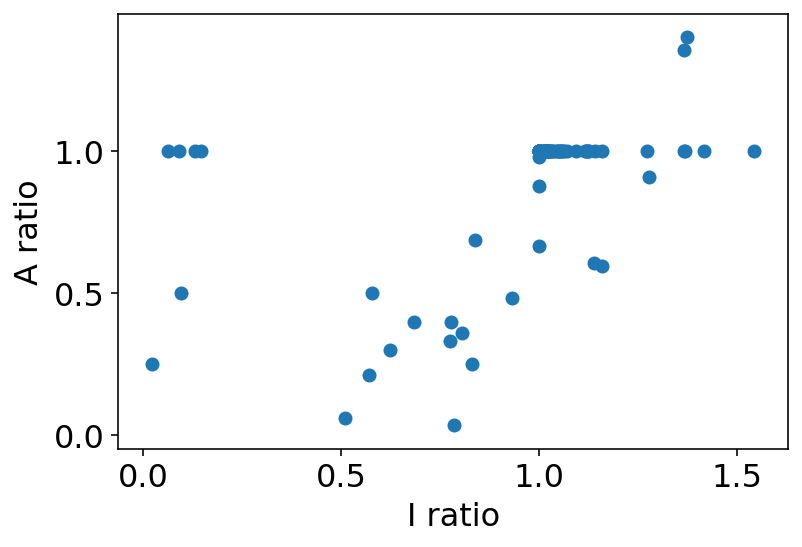

0.9552070716454787 17894611.220286775


Text(0, 0.5, 'C ratio')

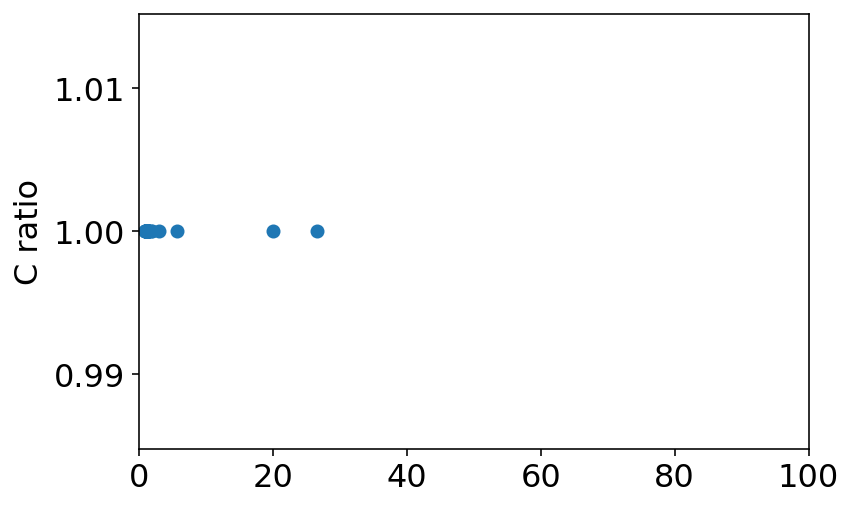

In [69]:
# plot A ratio vs. I ratio and range of C ratio

matplotlib.rcParams.update({'font.size': 16}) # sets the font size for characteristics figures

plt.scatter(Irats,[1./a for a in Arats])
plt.xlabel('I ratio')
plt.ylabel('A ratio')
#plt.ylim(0.9,1.)
#plt.xscale('log')
plt.show()

print (min(Crats),max(Crats))
plt.scatter(Crats,[1.]*len(Crats))
plt.xlim(0,100)
plt.ylabel('C ratio')
# plot #print (sorted(Crats))

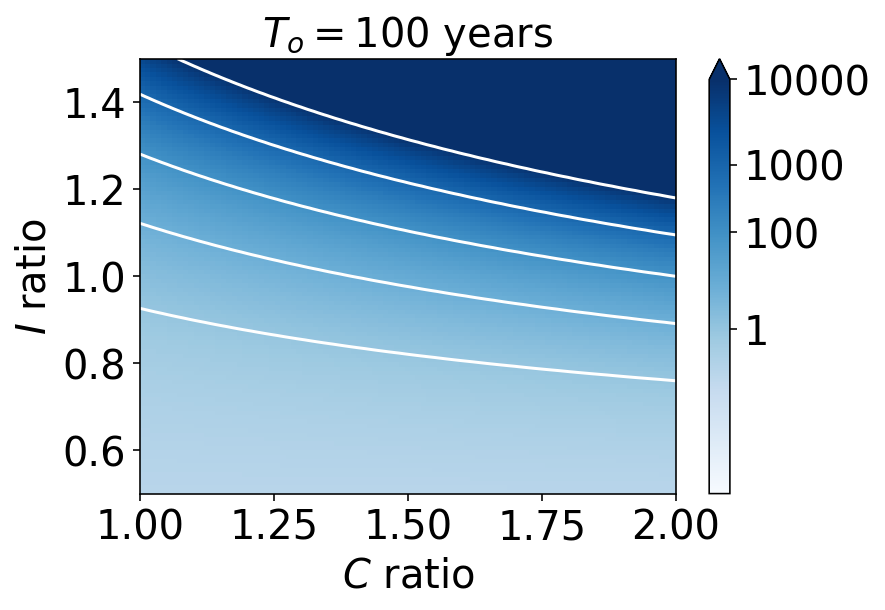

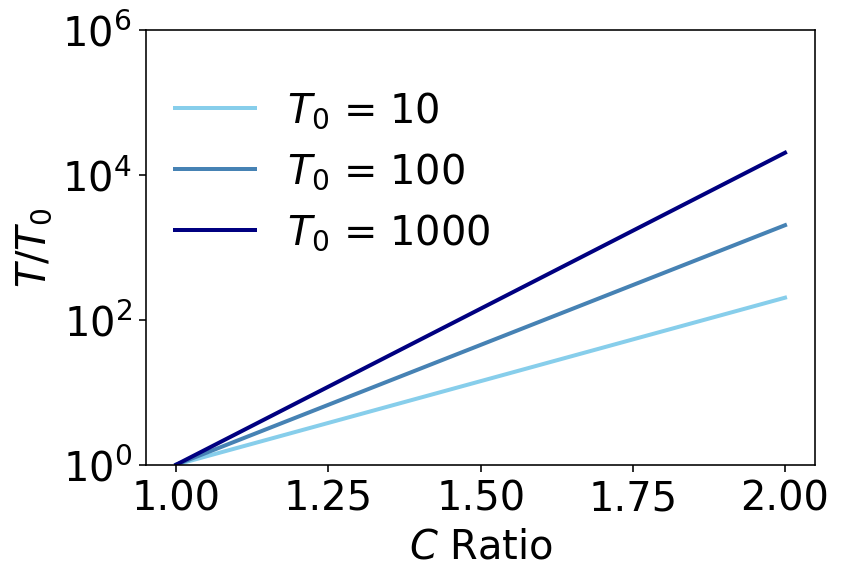

In [71]:
# 

import numpy as np
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams.update({'font.size': 20})

fs = 20
Dctcmin = 0.8
Dctcmax = 1.0
aratmin = 1.
aratmax = 1.1
cratmin = 1.0
cratmax = 2.0
psi = 3.
cm = 'Blues'#'Set2'#'jet' #'PuOr'#'BrBG'
#Cval = 1.0 #0.5

Dctcrats = nm.linspace(Dctcmin,Dctcmax,100)
Crats = nm.linspace(cratmin,cratmax,100)
Arats = nm.linspace(aratmin,aratmax,100)
Irats = nm.linspace(0.5,1.5,100)

def T(Crat,Arat,Irat,T0):
    p = Crat*Arat*Irat
    return nm.exp(psi*(p-1.))*T0**p


for iT in [100.]: # return period of 100 years

    xlist = Crats
    ylist = Irats
    X, Y = np.meshgrid(xlist, ylist)
    Z = T(X,(Y-0.5),Y,iT)
    for i in range(len(Z)):
        for j in range(len(Z[i])):
            if Z[i][j]<iT:
                break
                Z[i][j] = iT
    fig,ax=plt.subplots(1,1)#,figsize=(5,4))
    pcm = ax.pcolor(X, Y, Z,norm=colors.PowerNorm(gamma=0.1),cmap = cm,vmin=0,vmax = 10000)
    fig.colorbar(pcm, extend='max',cmap = cm,ticks=[1,100,1000,10000,100000])
    CL=plt.contour(X, Y, Z,norm=colors.PowerNorm(gamma=1.),colors = 'w',
                levels = [1,10,100,1000,10000])
    ax.set_title('$T_o=$'+str(int(iT))+' years',fontsize = fs)
    plt.xlabel('$C$ ratio')
    plt.ylabel('$I$ ratio')#, (related to 1/$A$ ratio)')
    plt.show()
j = 0
colorlist = ['skyblue','steelblue','navy']
#Crats = nm.linspace (1.,1.5,100)
for iT in [10.,100.,1000.]:
    plt.plot(Crats,T(Crats,1.,1.,iT)/iT,label = '$T_0$ = '+str(int(iT)),linewidth = 2, c = colorlist[j])
    j+=1
    plt.xlabel('$C$ Ratio')
    plt.ylabel('$T/T_0$')
plt.yscale ('log')
plt.ylim(1,1000000)
plt.legend(frameon=False,loc=[0.02,0.45])
#plt.plot([1.,1.5],[1.,1.],c='k',linestyle = '--')
plt.show()
